<hr style='border:5px solid #3E8914'></hr>

# Project Overview  
Main goals for this project are:

 * To clean and preprocess data
 * To perform Exploratory Data Analysis
 * To perform simple linear regression to estimate profit based on budget

Original data set with features description is available at:  
 https://www.kaggle.com/datasets/danielgrijalvas/movies

## 1. Data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
read_data = pd.read_csv('movies.csv')
df_raw = read_data.copy()
df_raw.head()

name rating      genre  year   
0                                     The Shining      R      Drama  1980  \
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director   
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick  \
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget   
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0  \
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df_raw.describe()

year        score         votes        budget         gross   
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03  \
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

## 2. Data Cleaning, Data Preprocessing and Feature Engineering

### 2.1 Duplicates

We are going to check if there are some duplicated rows.

In [5]:
df_raw.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Length: 7668, dtype: bool

In [6]:
df_raw.duplicated().any()

False

There are not any duplicated rows in our data set.

### 2.2 Handling Outliers

We are going to handle outliers. This task in general is more suited when preparing data to some regression model.  
Outliers can highly affect varience and bias in model hence they should be removed based on reasonable methods.  
We will use visualizaton and statistics to eliminate some obvious outliers in our numeric features.

In [7]:
df = df_raw.copy()

In [8]:
df.head()

name rating      genre  year   
0                                     The Shining      R      Drama  1980  \
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director   
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick  \
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget   
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0  \
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

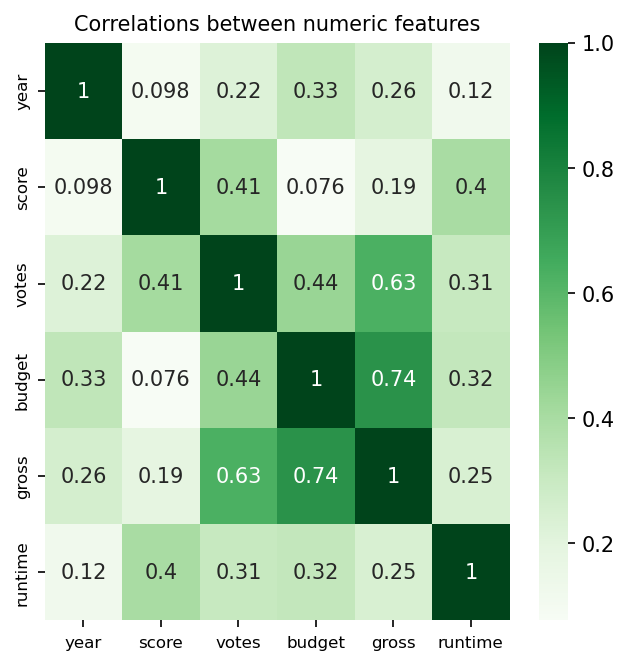

In [9]:
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Greens')
plt.title('Correlations between numeric features',fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [10]:
df.corr(numeric_only=True)['gross'].sort_values()

score      0.186258
runtime    0.245216
year       0.257486
votes      0.630757
budget     0.740395
gross      1.000000
Name: gross, dtype: float64

We will handle outliers in features: gross, budget, votes, score, and runtime.  
We will leave the year intact since that feature, although numerical,   
is rather objective and there is not much reason behind calculating basic statistics for it.  
Moreover, later on we will extract and transform that feature.

#### 2.2.1 Scatterplots and Outliers for: gross, budget, votes

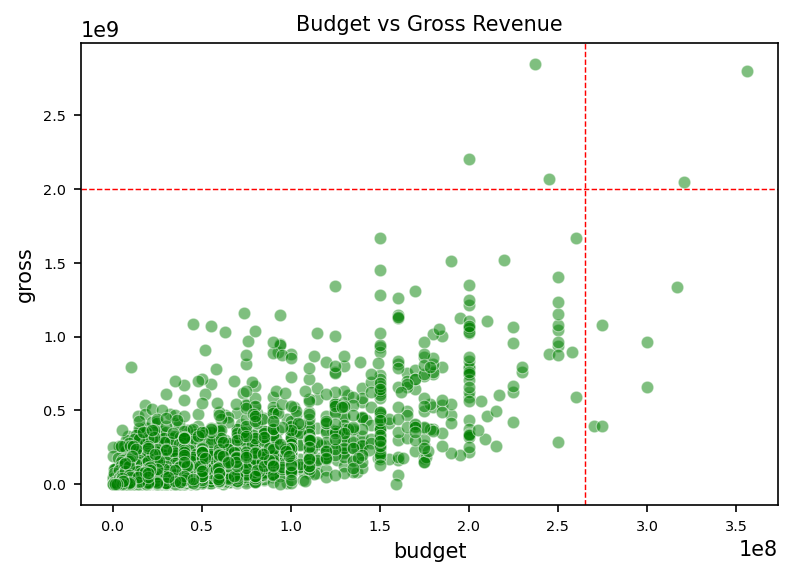

In [11]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='budget',y='gross',alpha=0.5,color='green')
plt.axhline(y=2000000000,color='red',ls='--',lw=0.7)
plt.axvline(x=265000000,color='red',ls='--',lw=0.7)
plt.title('Budget vs Gross Revenue',fontsize=10)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.show()

* We will remove films that negatively affect the correlation between budget and gross:
    * High Budget - Low Profit
    * Very High Profit
* This is the largest positive correlation found in the data.  
* This means that with the increase in the budget allocated to the production of the film,  
  we can also expect an increase in the profit.

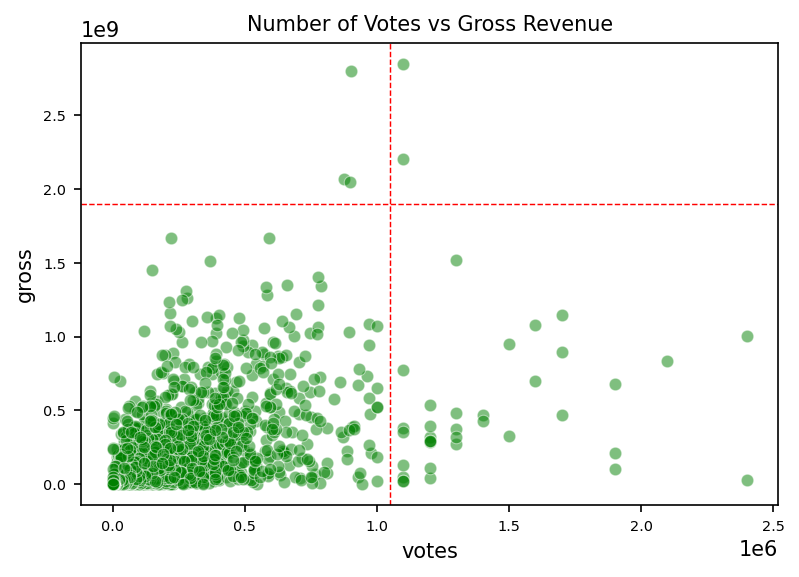

In [12]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='votes',y='gross',alpha=0.5,color='green')
plt.axhline(y=1900000000,color='red',ls='--',lw=0.7)
plt.axvline(x=1050000,color='red',ls='--',lw=0.7)
plt.title('Number of Votes vs Gross Revenue',fontsize=10)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.show()

* We will remove films that negatively affect the correlation votes and gross:
    * High votes - Low Profit
    * Extremly High Profit
* This is the second largest positive correlation found in the data.  
* It means that the more popular a film is (more votes), the greater its financial success

In [13]:
df[df['gross']>2000000000].index

Index([3045, 5445, 6663, 7244, 7445], dtype='int64')

In [14]:
df[df['votes']>1050000].index

Index([   2,  645, 1643, 1845, 2247, 2443, 2444, 2445, 2446, 2645, 3045, 3244,
       3245, 3443, 3444, 3449, 3450, 3645, 3648, 3845, 4048, 4245, 4647, 4652,
       4843, 4846, 5243, 5443, 5445, 5643, 5645, 6043, 6044, 6047, 6243, 6443,
       6444],
      dtype='int64')

In [15]:
df[df['budget']>265000000].index

Index([4870, 5060, 7066, 7075, 7244, 7261, 7445, 7463], dtype='int64')

In [16]:
idx_drop = df[(df['gross']>2000000000)|(df['votes']>1050000)|(df['budget']>265000000)].index

In [17]:
print('There will be removed {} outliers based on gross, budget, votes features.'.format(len(idx_drop)))

There will be removed 46 outliers based on gross, budget, votes features.


In [18]:
df = df.drop(idx_drop,axis=0)

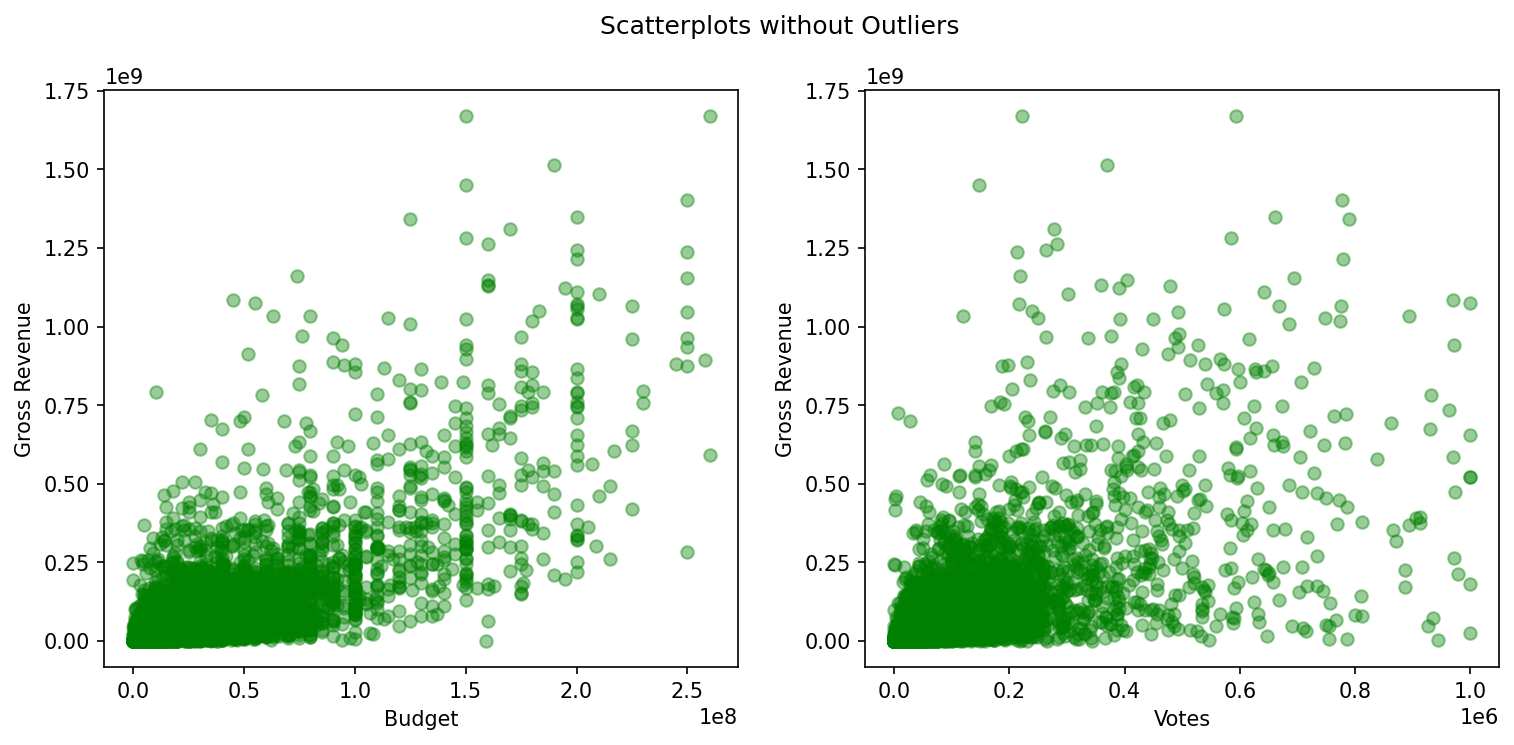

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5),dpi=150)
ax[0].plot(df['budget'],df['gross'],'o',alpha=0.4,color='green')
ax[0].set_xlabel('Budget')
ax[0].set_ylabel('Gross Revenue')
ax[1].plot(df['votes'],df['gross'],'o',alpha=0.4,color='green')
ax[1].set_xlabel('Votes')
ax[1].set_ylabel('Gross Revenue')
plt.suptitle('Scatterplots without Outliers')
plt.show()

#### 2.2.2 Boxplots and Outliers for: score and runtime

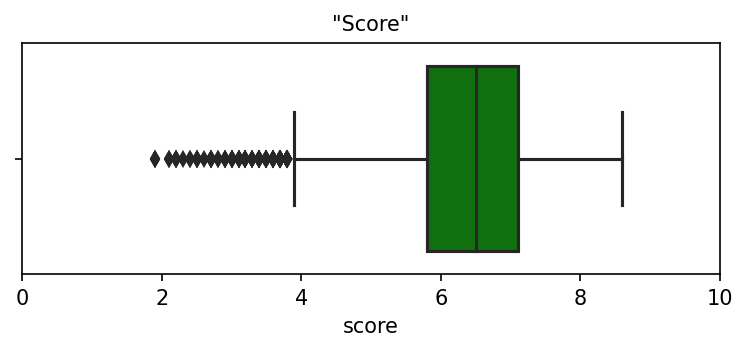

In [20]:
plt.figure(figsize=(6,2),dpi=150)
sns.boxplot(x=df['score'],color='green')
plt.title('"Score"',fontsize=10)
plt.xlim(0,10)
plt.show()

* Mean od Score is centerd around 6.5

Statistics calculations:

In [21]:
std_score = np.std(df['score'])
q75,q25 = np.nanpercentile(df['score'],[75,25])
mean_score = np.nanmean(df['score'])

In [22]:
IQR_score = q75-q25

In [23]:
lower_limit_std = round(mean_score - 3*std_score,2)
lower_limit_iqr = round(mean_score - 1.5*IQR_score,2)

In [24]:
print(lower_limit_std,lower_limit_iqr)

3.5 4.43


According to the calculations, we should assume that the outliers are below the limits shown above.  
However, we will apply a slightly more soft condition, treating the above rather as recommended values.

In [25]:
idx_score_drop = df[df['score']<3].index

In [26]:
print('There will be removed {} outliers based on "score" feature'.format(len(idx_score_drop)))

There will be removed 28 outliers based on "score" feature


In [27]:
df = df.drop(idx_score_drop,axis=0)

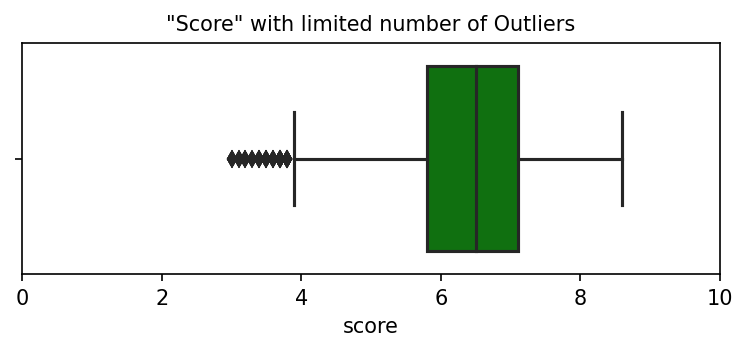

In [28]:
plt.figure(figsize=(6,2),dpi=150)
sns.boxplot(data=df,x='score',color='green')
plt.xlim(0,10)
plt.title('"Score" with limited number of Outliers',fontsize=10)
plt.show()

Statistics calculations:

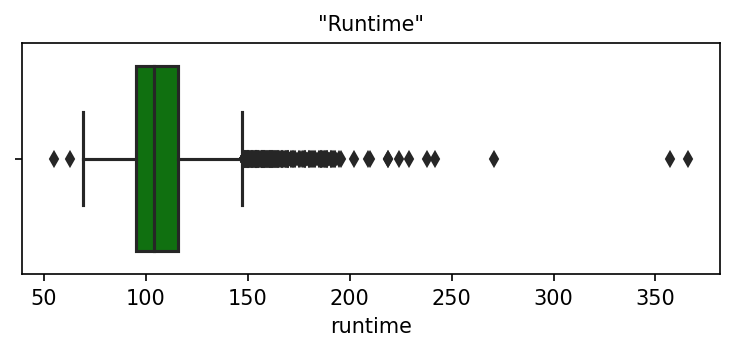

In [29]:
plt.figure(figsize=(6,2),dpi=150)
sns.boxplot(x=df['runtime'],color='green')
plt.title('"Runtime"',fontsize=10)
plt.show()

In [30]:
std_runtime = np.std(df['runtime'])
q75_r,q25_r = np.nanpercentile(df['runtime'],[75,25])
mean_runtime = np.nanmean(df['runtime'])

In [31]:
IQR_runtime = q75_r-q25_r

In [32]:
upper_limit_std_r = round(mean_runtime + 3*std_runtime,2)
upper_limit_iqr_r = round(mean_runtime + 1.5*IQR_runtime,2)

In [33]:
lower_limit_std_r = round(mean_runtime - 3*std_runtime,2)
lower_limit_iqr_r = round(mean_runtime - 1.5*IQR_runtime,2)

In [34]:
print(upper_limit_std_r,upper_limit_iqr_r)

161.81 138.55


In [35]:
print(lower_limit_std_r,lower_limit_iqr_r)

52.29 75.55


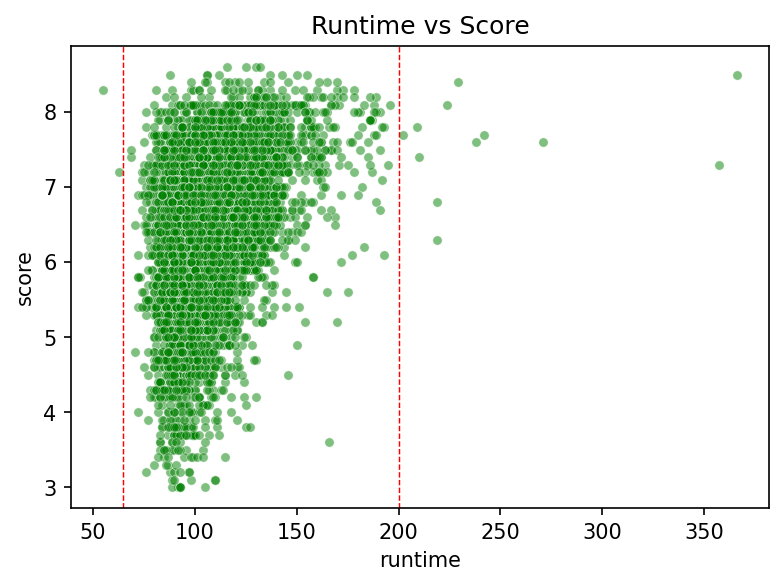

In [36]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='runtime',y='score',alpha=0.5,color='green',s=20)
plt.axvline(x=200,color='red',ls='--',lw=0.7)
plt.axvline(x=65,color='red',ls='--',lw=0.7)
plt.title('Runtime vs Score')
plt.show()

Based on 2 plots shown above we will keep films with runtime beetween 65 to 200 min.  
We can also see that vast majority of movies length is included in the range between 90 to 150 min.

In [37]:
df_runtime_1 = df[(df['runtime']>200)|(df['runtime']<lower_limit_std_r)]

In [38]:
df_runtime_2 = df[(df['runtime']>150)&(df['score']<4)]

In [39]:
df_runtime_3 = df[(df['runtime']<65)&(df['score']>7)]

In [40]:
df_runtime_drop = pd.concat([df_runtime_1,df_runtime_2,df_runtime_3],axis=0)

In [41]:
idx_runtime_drop = df_runtime_drop.index

In [42]:
idx_runtime_drop

Index([  21,  479, 1218, 1868, 2082, 2280, 2888, 3962, 3989, 4343, 4396, 7465,
       7585,  474, 5985],
      dtype='int64')

In [43]:
print('There will be removed {} outliers based on "runtime" feature'.format(len(idx_runtime_drop)))

There will be removed 15 outliers based on "runtime" feature


In [44]:
df = df.drop(idx_runtime_drop,axis=0)

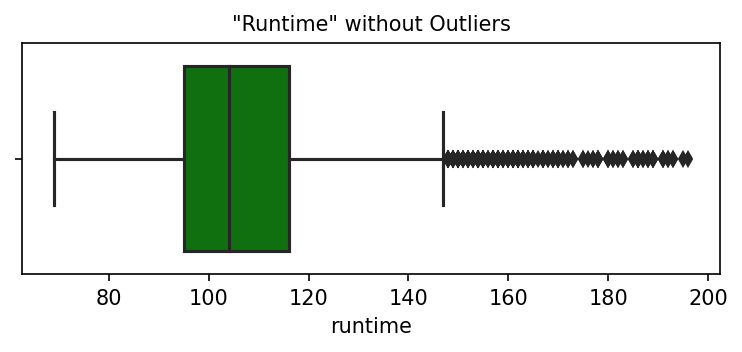

In [45]:
plt.figure(figsize=(6,2),dpi=150)
sns.boxplot(x=df['runtime'],color='green')
plt.title('"Runtime" without Outliers',fontsize=10)
plt.show()

In [46]:
print('Based on all conditions, there have been removed',len(idx_drop)+len(idx_runtime_drop)+len(idx_score_drop),'Outliers in total')

Based on all conditions, there have been removed 89 Outliers in total


### 2.3 Handling Missing values

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7579 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7579 non-null   object 
 1   rating    7503 non-null   object 
 2   genre     7579 non-null   object 
 3   year      7579 non-null   int64  
 4   released  7577 non-null   object 
 5   score     7576 non-null   float64
 6   votes     7576 non-null   float64
 7   director  7579 non-null   object 
 8   writer    7576 non-null   object 
 9   star      7579 non-null   object 
 10  country   7576 non-null   object 
 11  budget    5419 non-null   float64
 12  gross     7392 non-null   float64
 13  company   7562 non-null   object 
 14  runtime   7575 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 947.4+ KB


In [48]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [49]:
per_nan = percent_missing(df)

In [50]:
per_nan

released     0.026389
score        0.039583
votes        0.039583
writer       0.039583
country      0.039583
runtime      0.052777
company      0.224304
rating       1.002771
gross        2.467344
budget      28.499802
dtype: float64

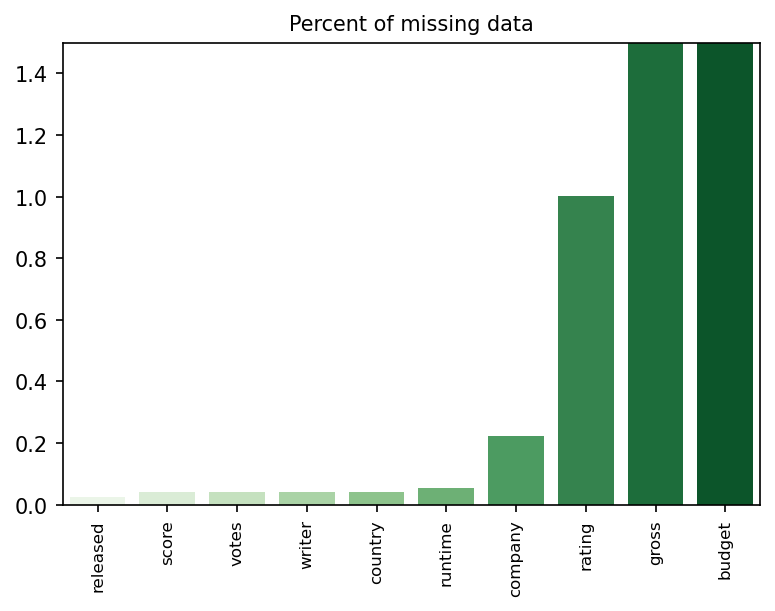

In [51]:
plt.figure(figsize=(6,4),dpi=150)
sns.barplot(x=per_nan.index,y=per_nan,palette='Greens')
plt.xticks(rotation=90,fontsize=8)
plt.title('Percent of missing data',fontsize=10)
plt.ylim(0,1.5)
plt.show()

For variables where percent of missing data is less than 1, we will remove those instances of data points.

In [52]:
per_nan[per_nan<1]

released    0.026389
score       0.039583
votes       0.039583
writer      0.039583
country     0.039583
runtime     0.052777
company     0.224304
dtype: float64

In [53]:
pct_below_one = round(per_nan[per_nan<1].sum(),2)

In [54]:
num_below_one = per_nan[per_nan<1].sum()*len(df)/100

In [55]:
print('We will drop these rows for features where the percent of missing values is lower than 1%.')
print('Summary percent of these features is equal to {}% which constitutes about {} data points'.format(pct_below_one,num_below_one))

We will drop these rows for features where the percent of missing values is lower than 1%.
Summary percent of these features is equal to 0.46% which constitutes about 35.0 data points


In [56]:
df = df.dropna(axis=0,subset=['released', 'score', 'votes', 'writer', 'country', 'runtime', 'company','rating'])

In [57]:
per_nan_1 = percent_missing(df)

In [58]:
per_nan_1

gross      2.150681
budget    27.918782
dtype: float64

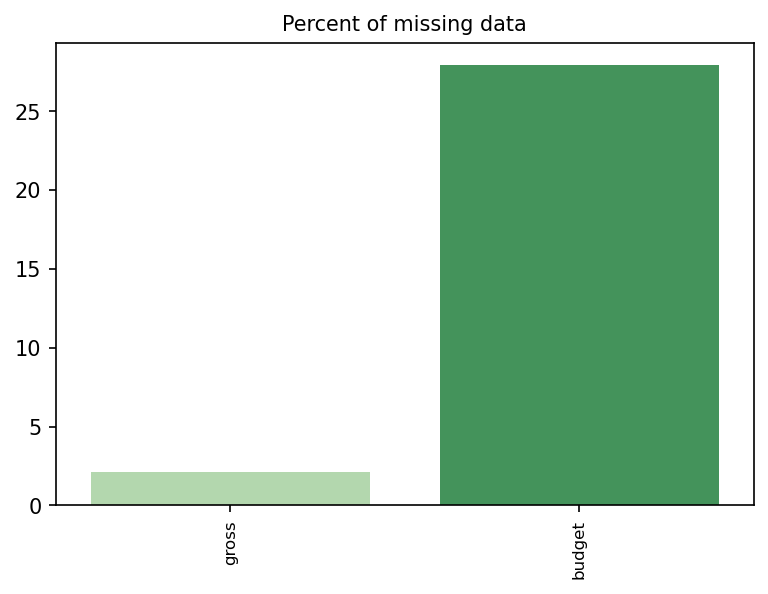

In [59]:
plt.figure(figsize=(6,4),dpi=150)
sns.barplot(x=per_nan_1.index,y=per_nan_1,palette='Greens')
plt.xticks(rotation=90,fontsize=8)
plt.title('Percent of missing data',fontsize=10)
plt.show()

In general percent of missing data for two remainig variables is too big to drop drop all the rows, and too small to get rid off whole feature. That would be also unreasonable since those are the best potetial estimators for regression tasks. 

The method of determining the missing values for the other two variables will be as follows:  
1. Based on the country of production of the film, we will designate the regions of the world.
2. We will determine the mean values of the variables (gross,budget) depending on the region.
3. We will fill missing values in accordance to region and mean values.

In [60]:
df['country'].replace('United Kingdom','UK',inplace=True)
df['country'].replace('United States','USA',inplace=True)
df['country'].replace('West Germany','Germany',inplace=True)
df['country'].replace('Federal Republic of Yugoslavia','Yugoslavia',inplace=True)

In [61]:
usa = ['USA'] 
uk = ['UK']
europe = ['Italy','Sweden','Spain','Switzerland','France',
          'Ireland','Germany','Austria','Portugal','Denmark',
          'Netherlands','Norway','Belgium','Iceland','Finland',
          'Malta','Yugoslavia','Republic of Macedonia','Russia',
          'Czech Republic','Hungary'] 
asia = ['South Korea','Hong Kong','Japan','China','Taiwan','Iran',
        'India','Israel','United Arab Emirates','Indonesia','Thailand']

In [62]:
def region(country):
    if country in usa:
        return 'USA'
    elif country in uk:
        return 'UK'
    elif country in europe:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    else:
        return 'Other'

In [63]:
df['region'] = np.vectorize(region)(df['country'])

In [64]:
df['region'].value_counts()

region
USA       5381
UK         803
Europe     666
Other      365
Asia       271
Name: count, dtype: int64

In [65]:
df.groupby('region')['gross'].mean()

region
Asia      6.395781e+07
Europe    3.099016e+07
Other     3.991883e+07
UK        6.013986e+07
USA       8.581847e+07
Name: gross, dtype: float64

Examples of Null Values for Gross before data transformation.

In [66]:
df[df['gross'].isnull()][['region','gross','name']].head()

region  gross                  name
27     UK    NaN     Raise the Titanic
41  Other    NaN        Breaker Morant
47    USA    NaN        The Boogey Man
49  Other    NaN    Lion of the Desert
52    USA    NaN  Can't Stop the Music

In [67]:
df['gross'] = df.groupby('region')['gross'].transform(lambda val: val.fillna(val.mean()))

In [68]:
df[(df['name']=='Raise the Titanic')|(df['name']=='Breaker Morant')|(df['name']=='The Boogey Man')]

name rating   genre  year                          released   
27  Raise the Titanic     PG  Action  1980    August 1, 1980 (United States)  \
41     Breaker Morant     PG   Drama  1980          July 3, 1980 (Australia)   
47     The Boogey Man      R  Horror  1980  November 7, 1980 (United States)   

    score    votes         director          writer             star   
27    5.0   4100.0    Jerry Jameson    Adam Kennedy    Jason Robards  \
41    7.9  13000.0  Bruce Beresford  Jonathan Hardy  Edward Woodward   
47    4.6   3900.0      Ulli Lommel     Ulli Lommel     Suzanna Love   

      country      budget         gross   
27         UK  36000000.0  6.013986e+07  \
41  Australia         NaN  3.991883e+07   
47        USA    300000.0  8.581847e+07   

                                  company  runtime region  
27                              ITC Films    115.0     UK  
41  The South Australian Film Corporation    107.0  Other  
47           The Jerry Gross Organization     82.0    USA

In [69]:
df.groupby('region')['budget'].mean()

region
Asia      3.142091e+07
Europe    2.889595e+07
Other     2.443987e+07
UK        3.274033e+07
USA       3.620639e+07
Name: budget, dtype: float64

Examples of Null Values for Budget before data transformation.

In [70]:
df[df['budget'].isnull()][['region','budget','name']].head()

region  budget             name
16    USA     NaN             Fame
19    USA     NaN       Stir Crazy
24    USA     NaN     Urban Cowboy
25    USA     NaN   Altered States
26    USA     NaN  Little Darlings

In [71]:
df['budget'] = df.groupby('region')['budget'].transform(lambda val: val.fillna(val.mean()))

In [72]:
df[df['name']=='Fame'].iloc[0]

name                                Fame
rating                                 R
genre                              Drama
year                                1980
released    May 16, 1980 (United States)
score                                6.6
votes                            21000.0
director                     Alan Parker
writer                  Christopher Gore
star                         Eddie Barth
country                              USA
budget                   36206389.155044
gross                         21202829.0
company        Metro-Goldwyn-Mayer (MGM)
runtime                            134.0
region                               USA
Name: 16, dtype: object

In [73]:
per_nan_2 = percent_missing(df)

In [74]:
per_nan_2

Series([], dtype: float64)

In [75]:
print('Percent of missing values for every variable:\n')
for col in df.columns:
    missing = np.mean(df[col].isnull())*100
    print('Column:',col,'--',round(missing),'%')

print('\nThere is no missing data in data set.')

Percent of missing values for every variable:

Column: name -- 0 %
Column: rating -- 0 %
Column: genre -- 0 %
Column: year -- 0 %
Column: released -- 0 %
Column: score -- 0 %
Column: votes -- 0 %
Column: director -- 0 %
Column: writer -- 0 %
Column: star -- 0 %
Column: country -- 0 %
Column: budget -- 0 %
Column: gross -- 0 %
Column: company -- 0 %
Column: runtime -- 0 %
Column: region -- 0 %

There is no missing data in data set.


### 2.4 Data Manipulation

#### 2.4.1 Filltering votes feature

Based on domain knowledge we will filter down votes variable.  
While maintaining balance, we will remove videos that have not been rated more than 500 times (arbitrary choice)

In [76]:
print('"Votes" column\nmin:{}\nmax:{}'.format(df['votes'].min(),df['votes'].max()))

"Votes" column
min:35.0
max:1000000.0


In [77]:
df.nsmallest(100,'votes')

name     rating      genre  year   
7658    Black Wall Street Burning          R      Drama  2020  \
472                 Forever Young  Not Rated      Drama  1983   
841             Death of an Angel         PG      Drama  1985   
640   The Adventures of Pinocchio  Not Rated  Animation  1984   
329                 The Personals         PG     Comedy  1982   
...                           ...        ...        ...   ...   
3442                   Sweet Jane  Not Rated      Drama  1998   
313               Penitentiary II          R      Crime  1982   
1227                A Man in Love          R      Drama  1987   
1015               The Naked Cage          R     Action  1986   
831           Joshua Then and Now          R     Comedy  1985   

                                released  score  votes       director   
7658    February 7, 2020 (United States)    6.6   35.0   Marcus Brown  \
472     January 29, 1986 (United States)    6.7   51.0    David Drury   
841        March 7, 1986 (United States)    5.4   51.0  Petru Popescu   
640         June 8, 1984 (United States)    5.1   73.0     Ippei Kuri   
329         October 1982 (United States)    6.7   75.0   Peter Markle   
...                                  ...    ...    ...            ...   
3442    February 1, 1998 (United States)    7.0  534.0     Joe Gayton   
313        April 2, 1982 (United States)    4.4  538.0   Jamaa Fanaka   
1227      September 1987 (United States)    5.9  541.0    Diane Kurys   
1015       March 7, 1986 (United States)    5.2  543.0  Paul Nicholas   
831   September 20, 1985 (United States)    6.6  545.0   Ted Kotcheff   

                writer                star country        budget   
7658   Dekoven Riggins         Dan Belcher     USA  5.000000e+03  \
472       Ray Connolly        James Aubrey      UK  3.274033e+07   
841      Petru Popescu      Bonnie Bedelia     USA  3.620639e+07   
640    Donald Paonessa      Danielle Romeo     USA  3.620639e+07   
329       Peter Markle      Bill Schoppert     USA  4.350000e+05   
...                ...                 ...     ...           ...   
3442        Joe Gayton     Samantha Mathis     USA  3.620639e+07   
313       Jamaa Fanaka  Leon Isaac Kennedy     USA  3.620639e+07   
1227       Diane Kurys        Peter Coyote  France  2.889595e+07   
1015     Paul Nicholas      Shari Shattuck     USA  3.620639e+07   
831   Mordecai Richler         James Woods  Canada  2.443987e+07   

             gross                    company  runtime  region  
7658  8.581847e+07               Notis Studio     78.0     USA  
472   6.013986e+07         Channel Four Films     84.0      UK  
841   8.581847e+07                    Angeles     91.0     USA  
640   8.581847e+07  Century Video Corporation     98.0     USA  
329   8.581847e+07       Blueline Productions     90.0     USA  
...            ...                        ...      ...     ...  
3442  8.581847e+07        NEO Motion Pictures     83.0     USA  
313   3.178542e+06        Bob-Bea Productions    108.0     USA  
1227  9.494510e+05            Alexandre Films    125.0  Europe  
1015  3.136701e+06           The Cannon Group     97.0     USA  
831   5.424200e+05                  Films RSL    119.0   Other  

[100 rows x 16 columns]

In [78]:
df = df[df['votes']>=500]

We will change unit of variable for better readability. [k]

In [79]:
df['votes'] = df['votes'].apply(lambda x: round(x/1000,1))

#### 2.4.2 Casting variable type

In [80]:
df['runtime'] = df['runtime'].astype('int64')

#### 2.4.3 Working with 'year' and 'released' columns

In [81]:
df['released'].iloc[0]

'June 13, 1980 (United States)'

In [82]:
date = df['released'].str.split('(').str[0].str.strip()

In [83]:
date.head()

0    June 13, 1980
1     July 2, 1980
3     July 2, 1980
4    July 25, 1980
5      May 9, 1980
Name: released, dtype: object

In [84]:
df['release_date'] = pd.to_datetime(date, format='mixed')

In [85]:
df['release_date'].info()

<class 'pandas.core.series.Series'>
Index: 7399 entries, 0 to 7653
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
7399 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 115.6 KB


Setting new 'release_year' column  
Setting new 'release_month' column

In [86]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

Convergence percentage of 'year' and 'release_year' columns

In [87]:
print(np.round(np.mean(np.equal(df['release_year'],df['year']))*100,1),'%')

82.8 %


Examples of movies with different release dates

In [88]:
df[np.equal(df['year'],df['release_year']) == False].head()[['name','release_year','year']]

name  release_year  year
8                        Superman II          1981  1980
11            The Gods Must Be Crazy          1984  1980
33  Cattle Annie and Little Britches          1981  1980
40          The Watcher in the Woods          1981  1980
49                Lion of the Desert          1981  1980

Dropping 'year' column because of discrepancy with 'release_year'  
Dropping other features which will not be used in analysis

In [89]:
df = df.drop(['released','year','release_date','country','writer','rating'],axis=1)

#### 2.4.4 Creating 'decade' column

In [90]:
df['release_year']

0       1980
1       1980
3       1980
4       1980
5       1980
        ... 
7649    2020
7650    2020
7651    2020
7652    2020
7653    2020
Name: release_year, Length: 7399, dtype: int32

In [91]:
df.describe().loc[:,'release_year']

count    7399.000000
mean     2000.722125
std        11.057083
min      1980.000000
25%      1991.000000
50%      2001.000000
75%      2010.000000
max      2020.000000
Name: release_year, dtype: float64

In [92]:
def decade(year):
    if year >= 1980 and year<=1989:
        return '1980-1989'
    elif year >= 1990 and year<=1999:
        return '1990-1999'
    elif year >= 2000 and year<=2009:
        return '2000-2009'
    else:
        return '2010-2020'

In [93]:
df['decade'] = np.vectorize(decade)(df['release_year'])

#### 2.4.5 Calculating BR_ratio
Ratio shows how much cost to produce single minute of movie.  
Unit [MM/min]

In [94]:
def br_ratio(budget,runtime):
    br_ratio = round(budget/runtime,3)
    return br_ratio

In [95]:
df['br_ratio'] = df[['budget','runtime']].apply(lambda df:br_ratio(df['budget'],df['runtime']),axis=1)

#### 2.4.6 Index and columns adjustments

In [96]:
df.columns

Index(['name', 'genre', 'score', 'votes', 'director', 'star', 'budget',
       'gross', 'company', 'runtime', 'region', 'release_year',
       'release_month', 'decade', 'br_ratio'],
      dtype='object')

In [97]:
cols_new= ['name', 'genre', 'score', 'votes', 'release_month', 'release_year', 'decade',
           'star','director', 'company', 'region',
           'runtime','budget','br_ratio', 'gross']

In [98]:
df=df[cols_new]

In [99]:
df.reset_index(inplace=True)

In [100]:
df.drop('index',axis=1,inplace=True)

In [101]:
df.head()

name      genre  score  votes  release_month  release_year   
0      The Shining      Drama    8.4  927.0              6          1980  \
1  The Blue Lagoon  Adventure    5.8   65.0              7          1980   
2        Airplane!     Comedy    7.7  221.0              7          1980   
3       Caddyshack     Comedy    7.3  108.0              7          1980   
4  Friday the 13th     Horror    6.4  123.0              5          1980   

      decade            star            director             company region   
0  1980-1989  Jack Nicholson     Stanley Kubrick        Warner Bros.     UK  \
1  1980-1989  Brooke Shields      Randal Kleiser   Columbia Pictures    USA   
2  1980-1989     Robert Hays        Jim Abrahams  Paramount Pictures    USA   
3  1980-1989     Chevy Chase        Harold Ramis      Orion Pictures    USA   
4  1980-1989    Betsy Palmer  Sean S. Cunningham  Paramount Pictures    USA   

   runtime      budget    br_ratio       gross  
0      146  19000000.0  130136.986  46998772.0  
1      104   4500000.0   43269.231  58853106.0  
2       88   3500000.0   39772.727  83453539.0  
3       98   6000000.0   61224.490  39846344.0  
4       95    550000.0    5789.474  39754601.0

Checking unique values for every column

In [102]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print('Unique values: {} \nColumn: "{}"\n'.format(df[col].nunique(),col),df[col].unique(),'\n')
    elif df[col].dtypes == 'int32':
        print('Unique values: {} \nColumn: "{}"\n'.format(df[col].nunique(),col),df[col].unique(),'\n')
    else:
        print('Column "{}" holds continuous numeric value'.format(col),'\n')

Unique values: 7257 
Column: "name"
 ['The Shining' 'The Blue Lagoon' 'Airplane!' ... 'The Call of the Wild'
 'The Eight Hundred' 'The Quarry'] 

Unique values: 17 
Column: "genre"
 ['Drama' 'Adventure' 'Comedy' 'Horror' 'Action' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Thriller'
 'Western' 'Mystery' 'Sport'] 

Column "score" holds continuous numeric value 

Column "votes" holds continuous numeric value 

Unique values: 12 
Column: "release_month"
 [ 6  7  5 12 10  9  2  8  3  4 11  1] 

Unique values: 41 
Column: "release_year"
 [1980 1981 1984 1983 1982 1992 1987 1985 1986 1990 1989 1988 2008 1991
 1993 1999 2016 1997 1994 1995 2019 1996 2001 2000 1998 2014 2002 2003
 2005 2004 2006 2007 2010 2011 2009 2013 2015 2012 2017 2018 2020] 

Unique values: 4 
Column: "decade"
 ['1980-1989' '1990-1999' '2000-2009' '2010-2020'] 

Unique values: 2682 
Column: "star"
 ['Jack Nicholson' 'Brooke Shields' 'Robert Hays' ... 'Ben Schwartz'
 'Zhi-zhong Huang' 'S

## 3. Exploratory Data Analysis

### 3.1 Region Analysis

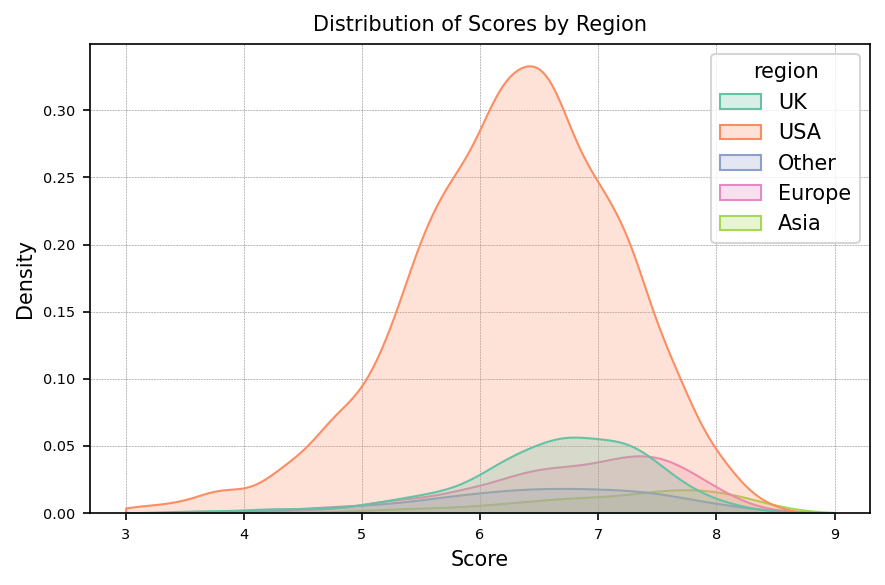

In [103]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(6,4),dpi=150)
sns.kdeplot(data=df,x='score',hue='region',palette='Set2',clip=[3,9],fill=True,legend=True)
plt.title('Distribution of Scores by Region', fontsize = 10)
plt.ylabel('Density', fontsize=10)
plt.xlabel('Score', fontsize=10)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.25)
plt.tight_layout()
plt.show()

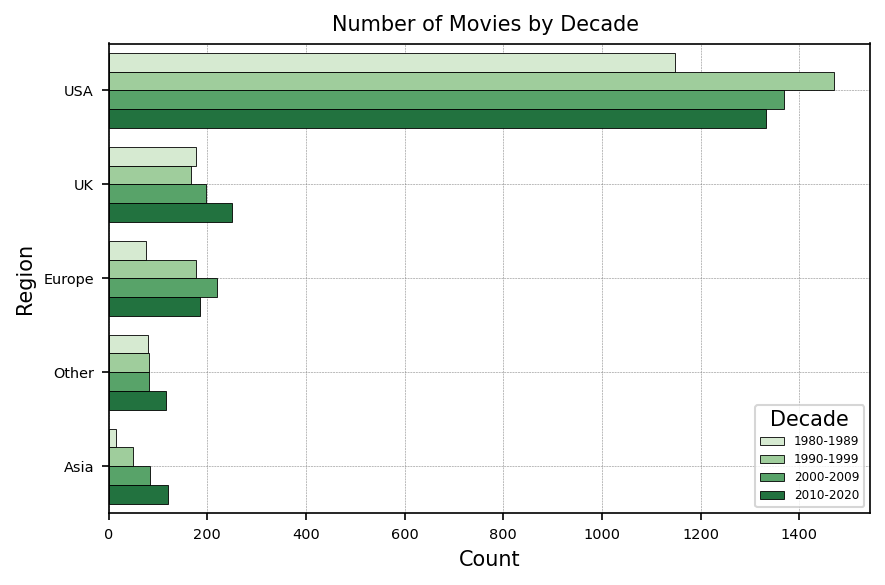

In [104]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(6,4),dpi=150)
sns.countplot(data=df,
              y='region',
              palette='Greens',
              hue = 'decade',
              order=['USA','UK','Europe','Other','Asia'],
              edgecolor = 'black',
              linewidth = 0.4)

plt.title('Number of Movies by Decade ', fontsize = 10)
plt.ylabel('Region', fontsize=10)
plt.xlabel('Count', fontsize=10)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.25)
plt.legend(title='Decade',loc='lower right',fontsize='xx-small')
plt.tight_layout()
plt.show()

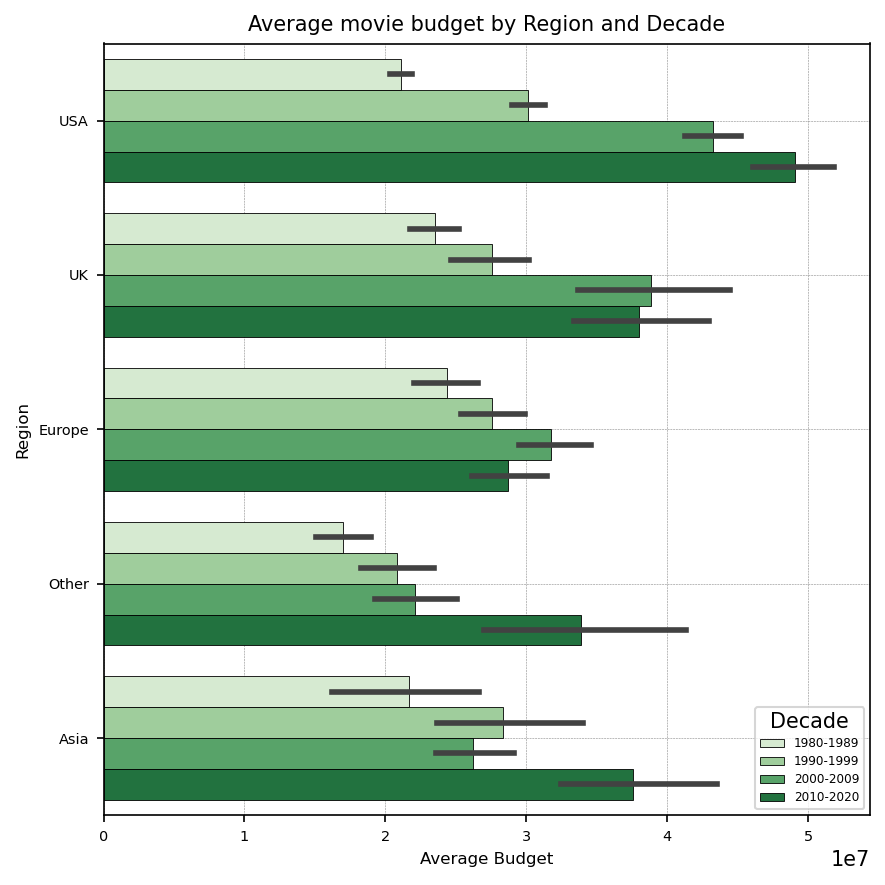

In [105]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(6,6),dpi=150)
sns.barplot(y='region',x='budget',data=df,estimator=np.mean,palette='Greens',
            order=['USA','UK','Europe','Other','Asia'],
            edgecolor = 'black',
            linewidth = 0.4,
            hue='decade')
plt.title('Average movie budget by Region and Decade', fontsize = 10)
plt.ylabel('Region', fontsize=8)
plt.xlabel('Average Budget', fontsize=8)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.25)
plt.legend(title='Decade',loc='lower right',fontsize='xx-small')
plt.tight_layout()
plt.show()

#### Inferences:
1. The vast majority of the movies comes from the US, due to the fact that the data comes from an American website IMDB.
2. With each subsequent decade, the average film budget increases in every region of the world.
3. The mean value of movie budget in USA in 2010-2020 is on average 10,000,000 higher than movie budgets in Asia and UK.
4. Mean values of scores for regions different than US are higher. It can be due to unproportionally lower sample size.

### 3.2 Score - Votes - Genre Analysis

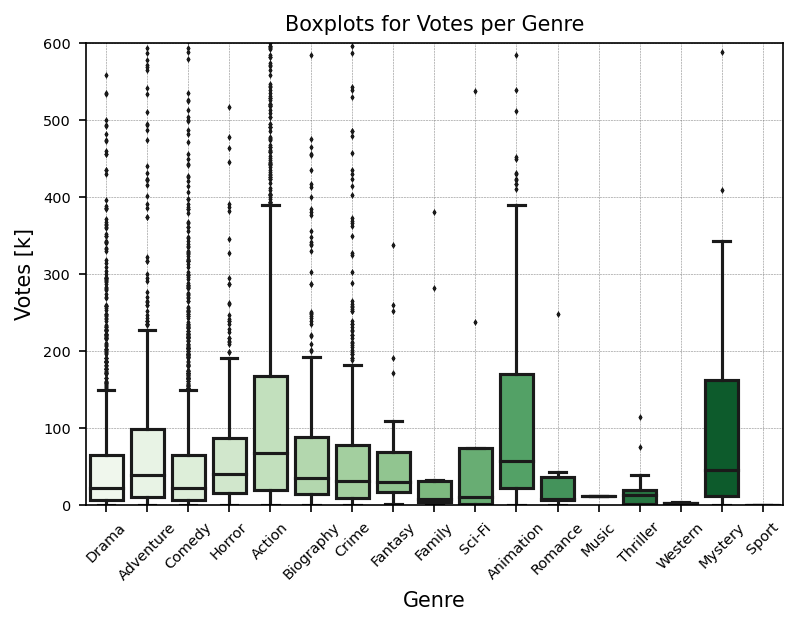

In [106]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(data=df,y='votes',x='genre',palette='Greens',dodge=True,fliersize=1)
plt.title('Boxplots for Votes per Genre', fontsize = 10)
plt.ylabel('Votes [k]', fontsize=10)
plt.ylim(0,600)
plt.xlabel('Genre', fontsize=10)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small',rotation=45)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.25)
plt.show()

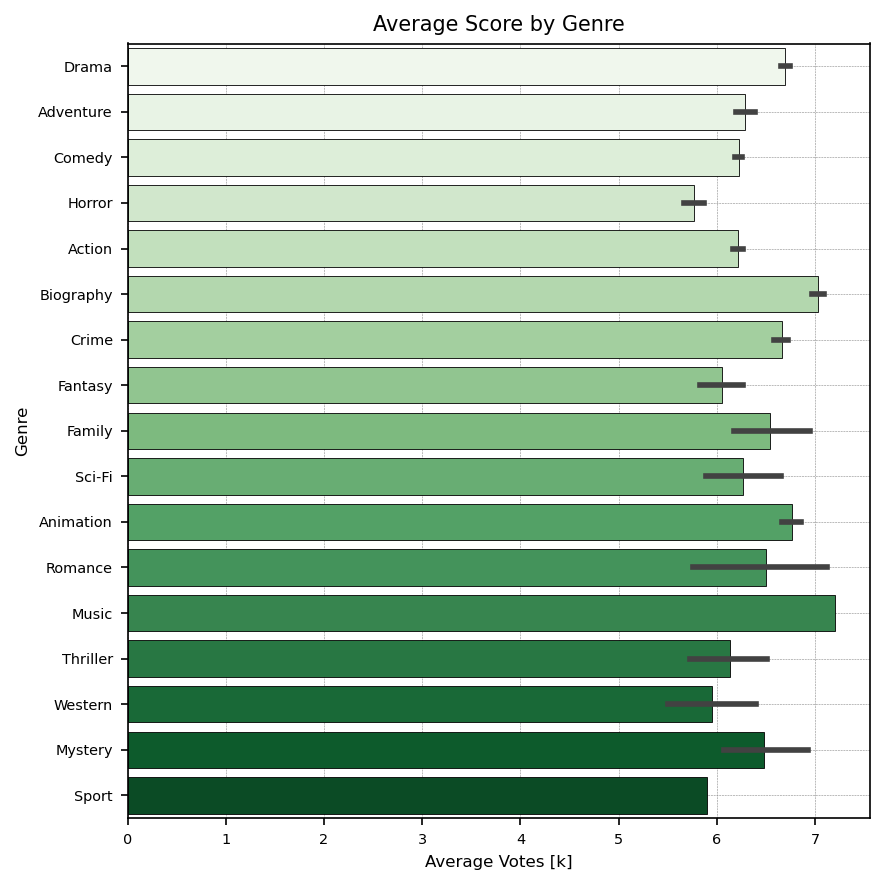

In [107]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(6,6),dpi=150)
sns.barplot(y='genre',x='score',data=df,estimator=np.mean,palette='Greens',
            edgecolor = 'black',
            linewidth = 0.4)
plt.title('Average Score by Genre', fontsize = 10)
plt.ylabel('Genre', fontsize=8)
plt.xlabel('Average Votes [k]', fontsize=8)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.25)
plt.tight_layout()
plt.show()

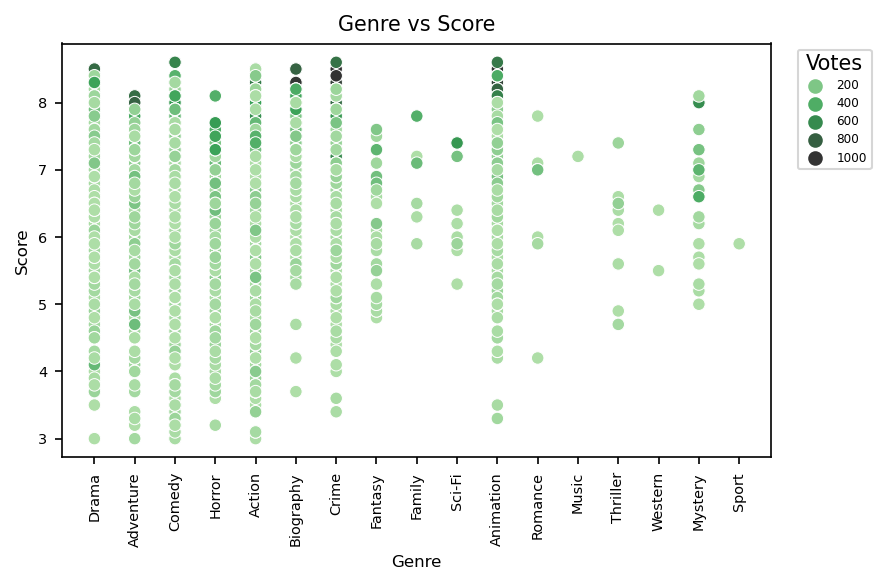

In [108]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='genre',y='score',alpha=1,color='green',hue='votes',palette='Greens_d')
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small',rotation=90)
plt.ylabel('Score', fontsize=8)
plt.xlabel('Genre', fontsize=8)
plt.title('Genre vs Score',fontsize=10)
plt.legend(title='Votes',bbox_to_anchor=(1.15, 1),fontsize='xx-small')

plt.tight_layout()
plt.show()

Polynomial simple regression - estimating coefficients

In [109]:
X1 = df['votes']
y1 = df['score']

In [110]:
np.polyfit(X1,y1,deg=3)

array([ 6.80417863e-09, -1.06369098e-05,  6.41479676e-03,  6.04495037e+00])

In [111]:
potentianl_score = np.linspace(0,1000,1000)

In [112]:
predicted_score = 3.31606757e-09*potentianl_score**3 +-7.01398964e-06*potentianl_score**2 + 5.63064660e-03*potentianl_score + 6.06368886e+00

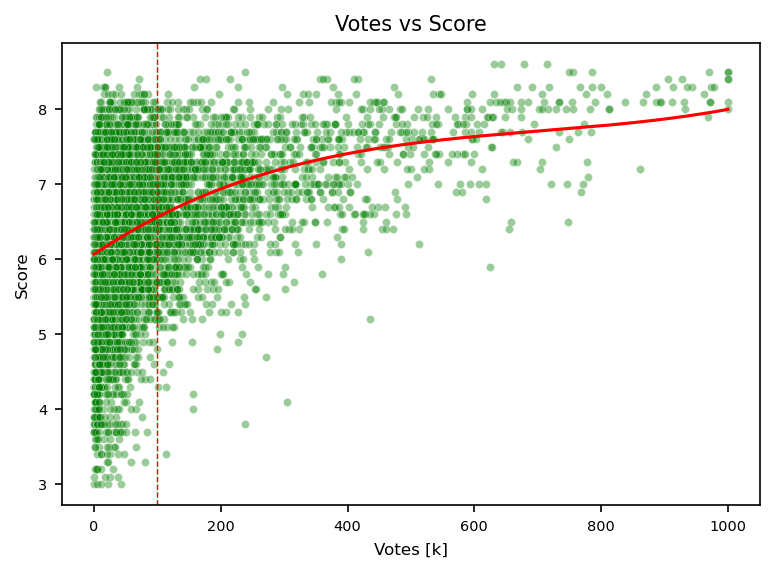

In [113]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='votes',y='score',color='green',alpha=0.4,s=15)
plt.plot(potentianl_score,predicted_score,color='red')
plt.axvline(x=100,color='red',ls='--',lw=0.7)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.ylabel('Score', fontsize=8)
plt.xlabel('Votes [k]', fontsize=8)
plt.title('Votes vs Score',fontsize=10)
plt.show()

#### Inferences:
1. Animations, Mystery, Action are the top 3 genre categories where both mean and 75th percentile are highest.
2. Movies most voted for are also the highest scored, across all genre. (Animtion, Crime, Adventure)
3. Polynomial regression line for votes and scores tell that there is approximetly logarithmic relationship betewwen them.
   For every 200,000 votes there is increse in score by 1 point. Then the trend gradually flattens out.
4. It is also worth noting that for the range of votes 0-100k there is a whole range of scores (3-10).
   From approximately 100k votes, one can expect videos rated above 5.0.
5. Movies with number of votes 400,000+ scores around of population mean and above.

### 3.3 Release Date Analysis

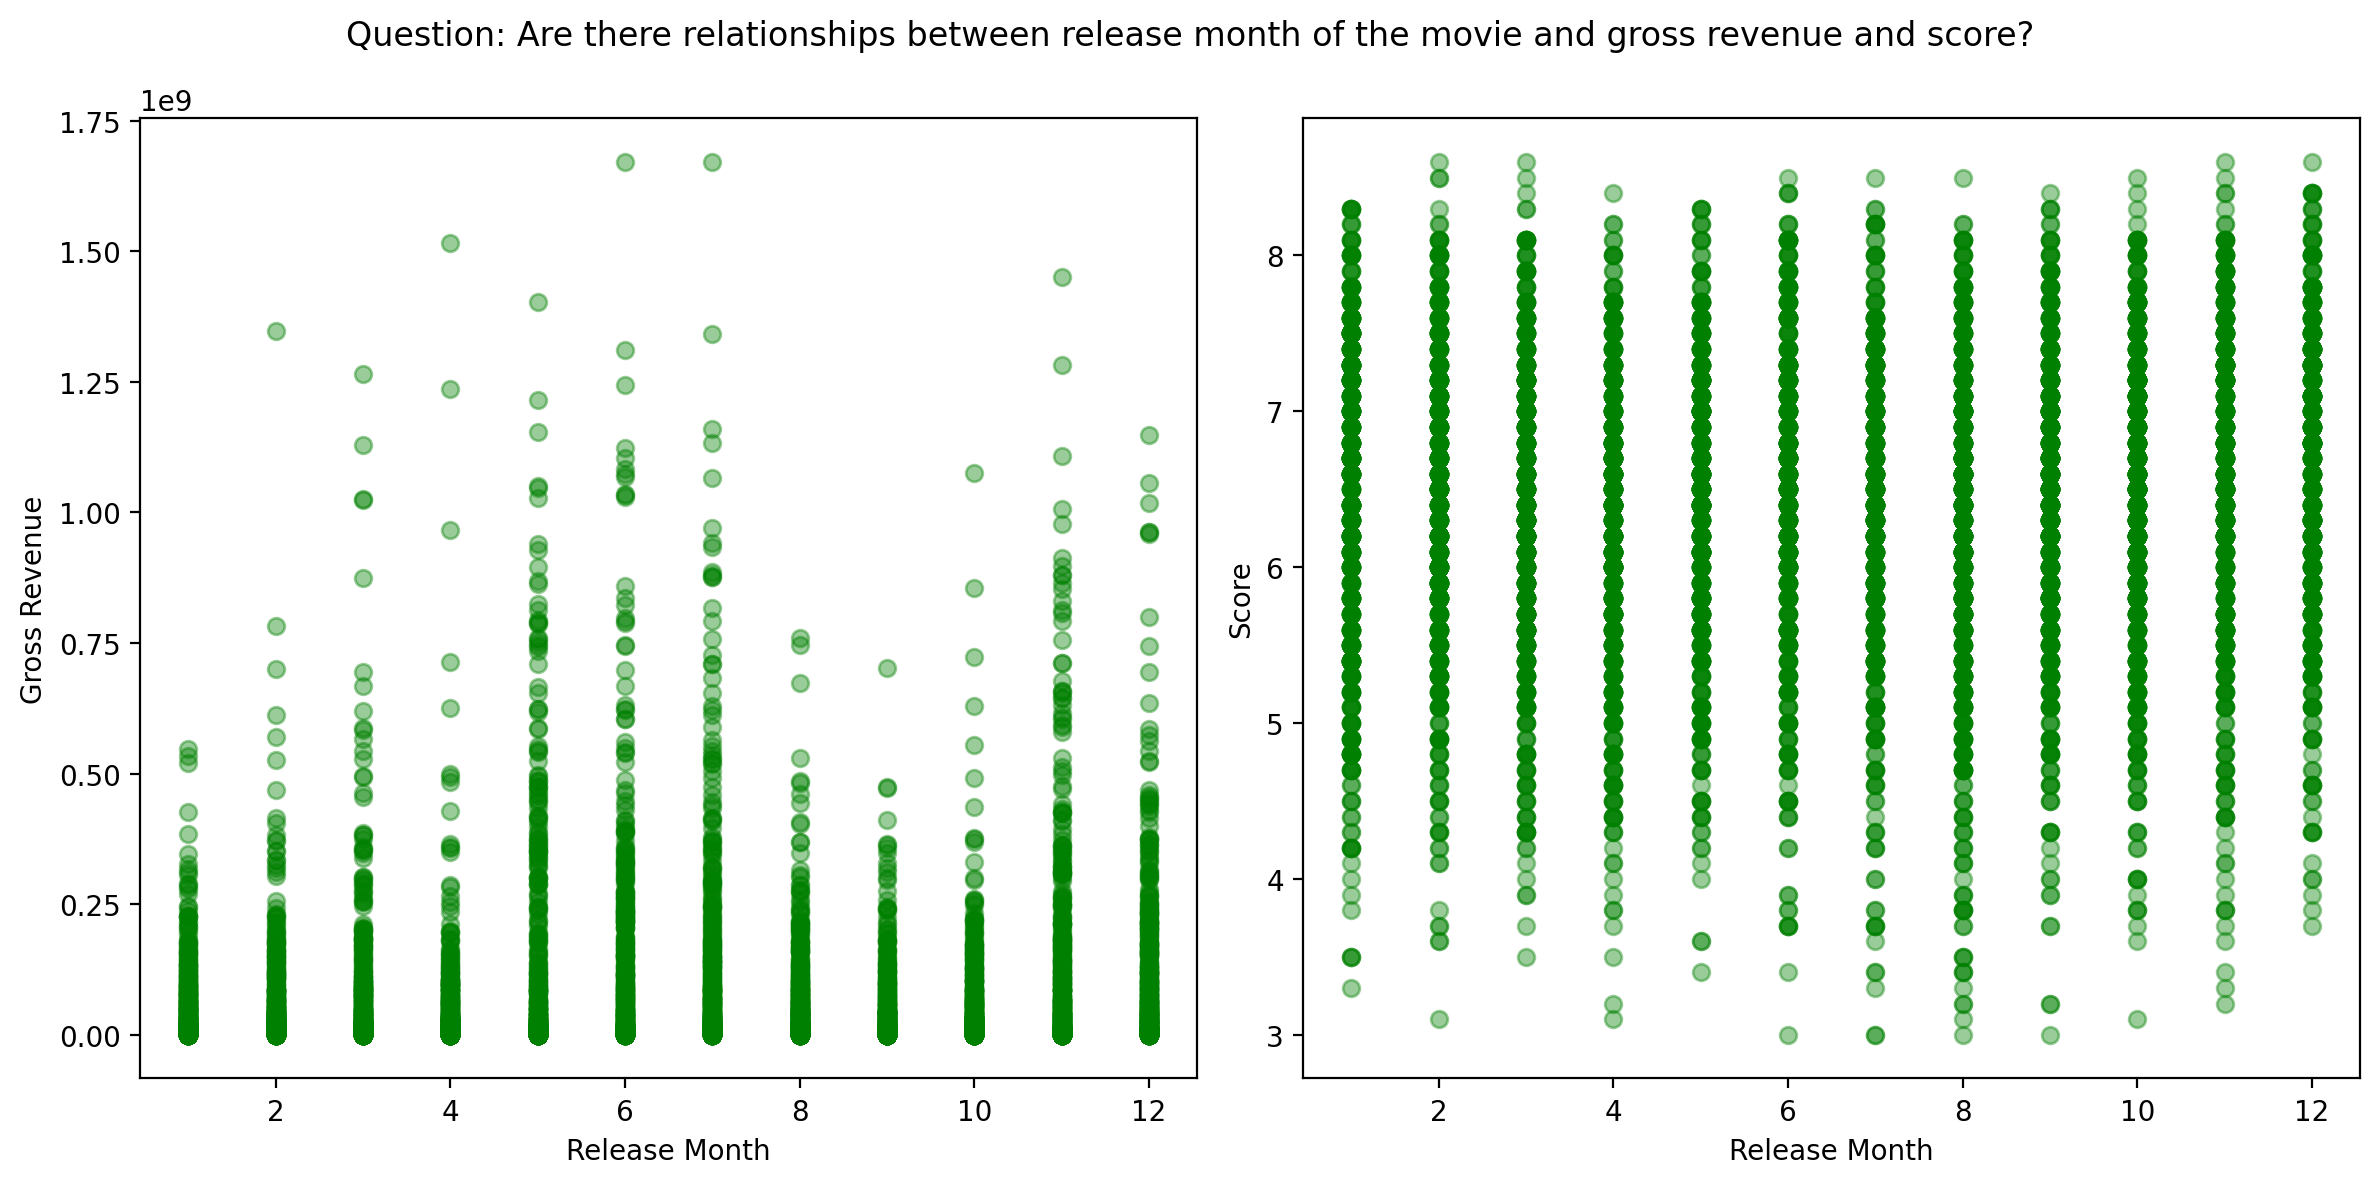

In [114]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),dpi=200)
ax[0].plot(df['release_month'],df['gross'],'o',alpha=0.4,color='green')
ax[0].set_xlabel('Release Month')
ax[0].set_ylabel('Gross Revenue')

ax[1].plot(df['release_month'],df['score'],'o',alpha=0.4,color='green')
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Score')
plt.suptitle('Question: Are there relationships between release month of the movie and gross revenue and score?',fontsize=12)
plt.tight_layout()
plt.show()

In [115]:
df.groupby('release_month')['gross'].mean()

release_month
1     5.176032e+07
2     5.615962e+07
3     6.372743e+07
4     4.611943e+07
5     1.159613e+08
6     1.333015e+08
7     1.170753e+08
8     5.162425e+07
9     3.951060e+07
10    4.524769e+07
11    1.080436e+08
12    1.046419e+08
Name: gross, dtype: float64

In [116]:
df.groupby('release_month')['score'].mean()

release_month
1     6.445918
2     6.405263
3     6.345524
4     6.255962
5     6.388214
6     6.448708
7     6.348063
8     6.250700
9     6.408386
10    6.453804
11    6.526149
12    6.580319
Name: score, dtype: float64

#### Inferences:
1. Movies with a release date in May, June, July, November, December have highest average profit. This is perhaps good  indicator  for potential success of the movie.
2. However, the above does not affect the average rating by month of release
3. This observations indicate that people more willingly go to cinema around holidays, but are also consistent in their ratings.

### 3.4 Stars, Directors and Companies

Will check the categories (Star,Director,Company) taking into account the 10 most common ones in data set.

In [117]:
df_star = df[df['star'].isin(df['star'].value_counts().head(10).index)]

In [118]:
df_company = df[df['company'].isin(df['company'].value_counts().head(10).index)]

In [119]:
df_director = df[df['director'].isin(df['director'].value_counts().head(10).index)]

In [120]:
df_company['company'].value_counts()

company
Universal Pictures           373
Columbia Pictures            330
Warner Bros.                 321
Paramount Pictures           316
Twentieth Century Fox        235
New Line Cinema              167
Touchstone Pictures          130
Metro-Goldwyn-Mayer (MGM)    122
Walt Disney Pictures         119
TriStar Pictures              94
Name: count, dtype: int64

In [121]:
dict_company = {'Universal Pictures':'Universal',
                'Columbia Pictures':'Columbia',
                'Warner Bros.':'Warner Bros.',
                'Paramount Pictures':'Paramount',
                'Twentieth Century Fox':'20th Fox',
                'New Line Cinema':'New Line',
                'Touchstone Pictures':'Touchstone',
                'Metro-Goldwyn-Mayer (MGM)':'MGM',
                'Walt Disney Pictures':'Walt Disney',
                'TriStar Pictures':'TriStar',}

In [122]:
df_company['company'] = df['company'].map(dict_company)

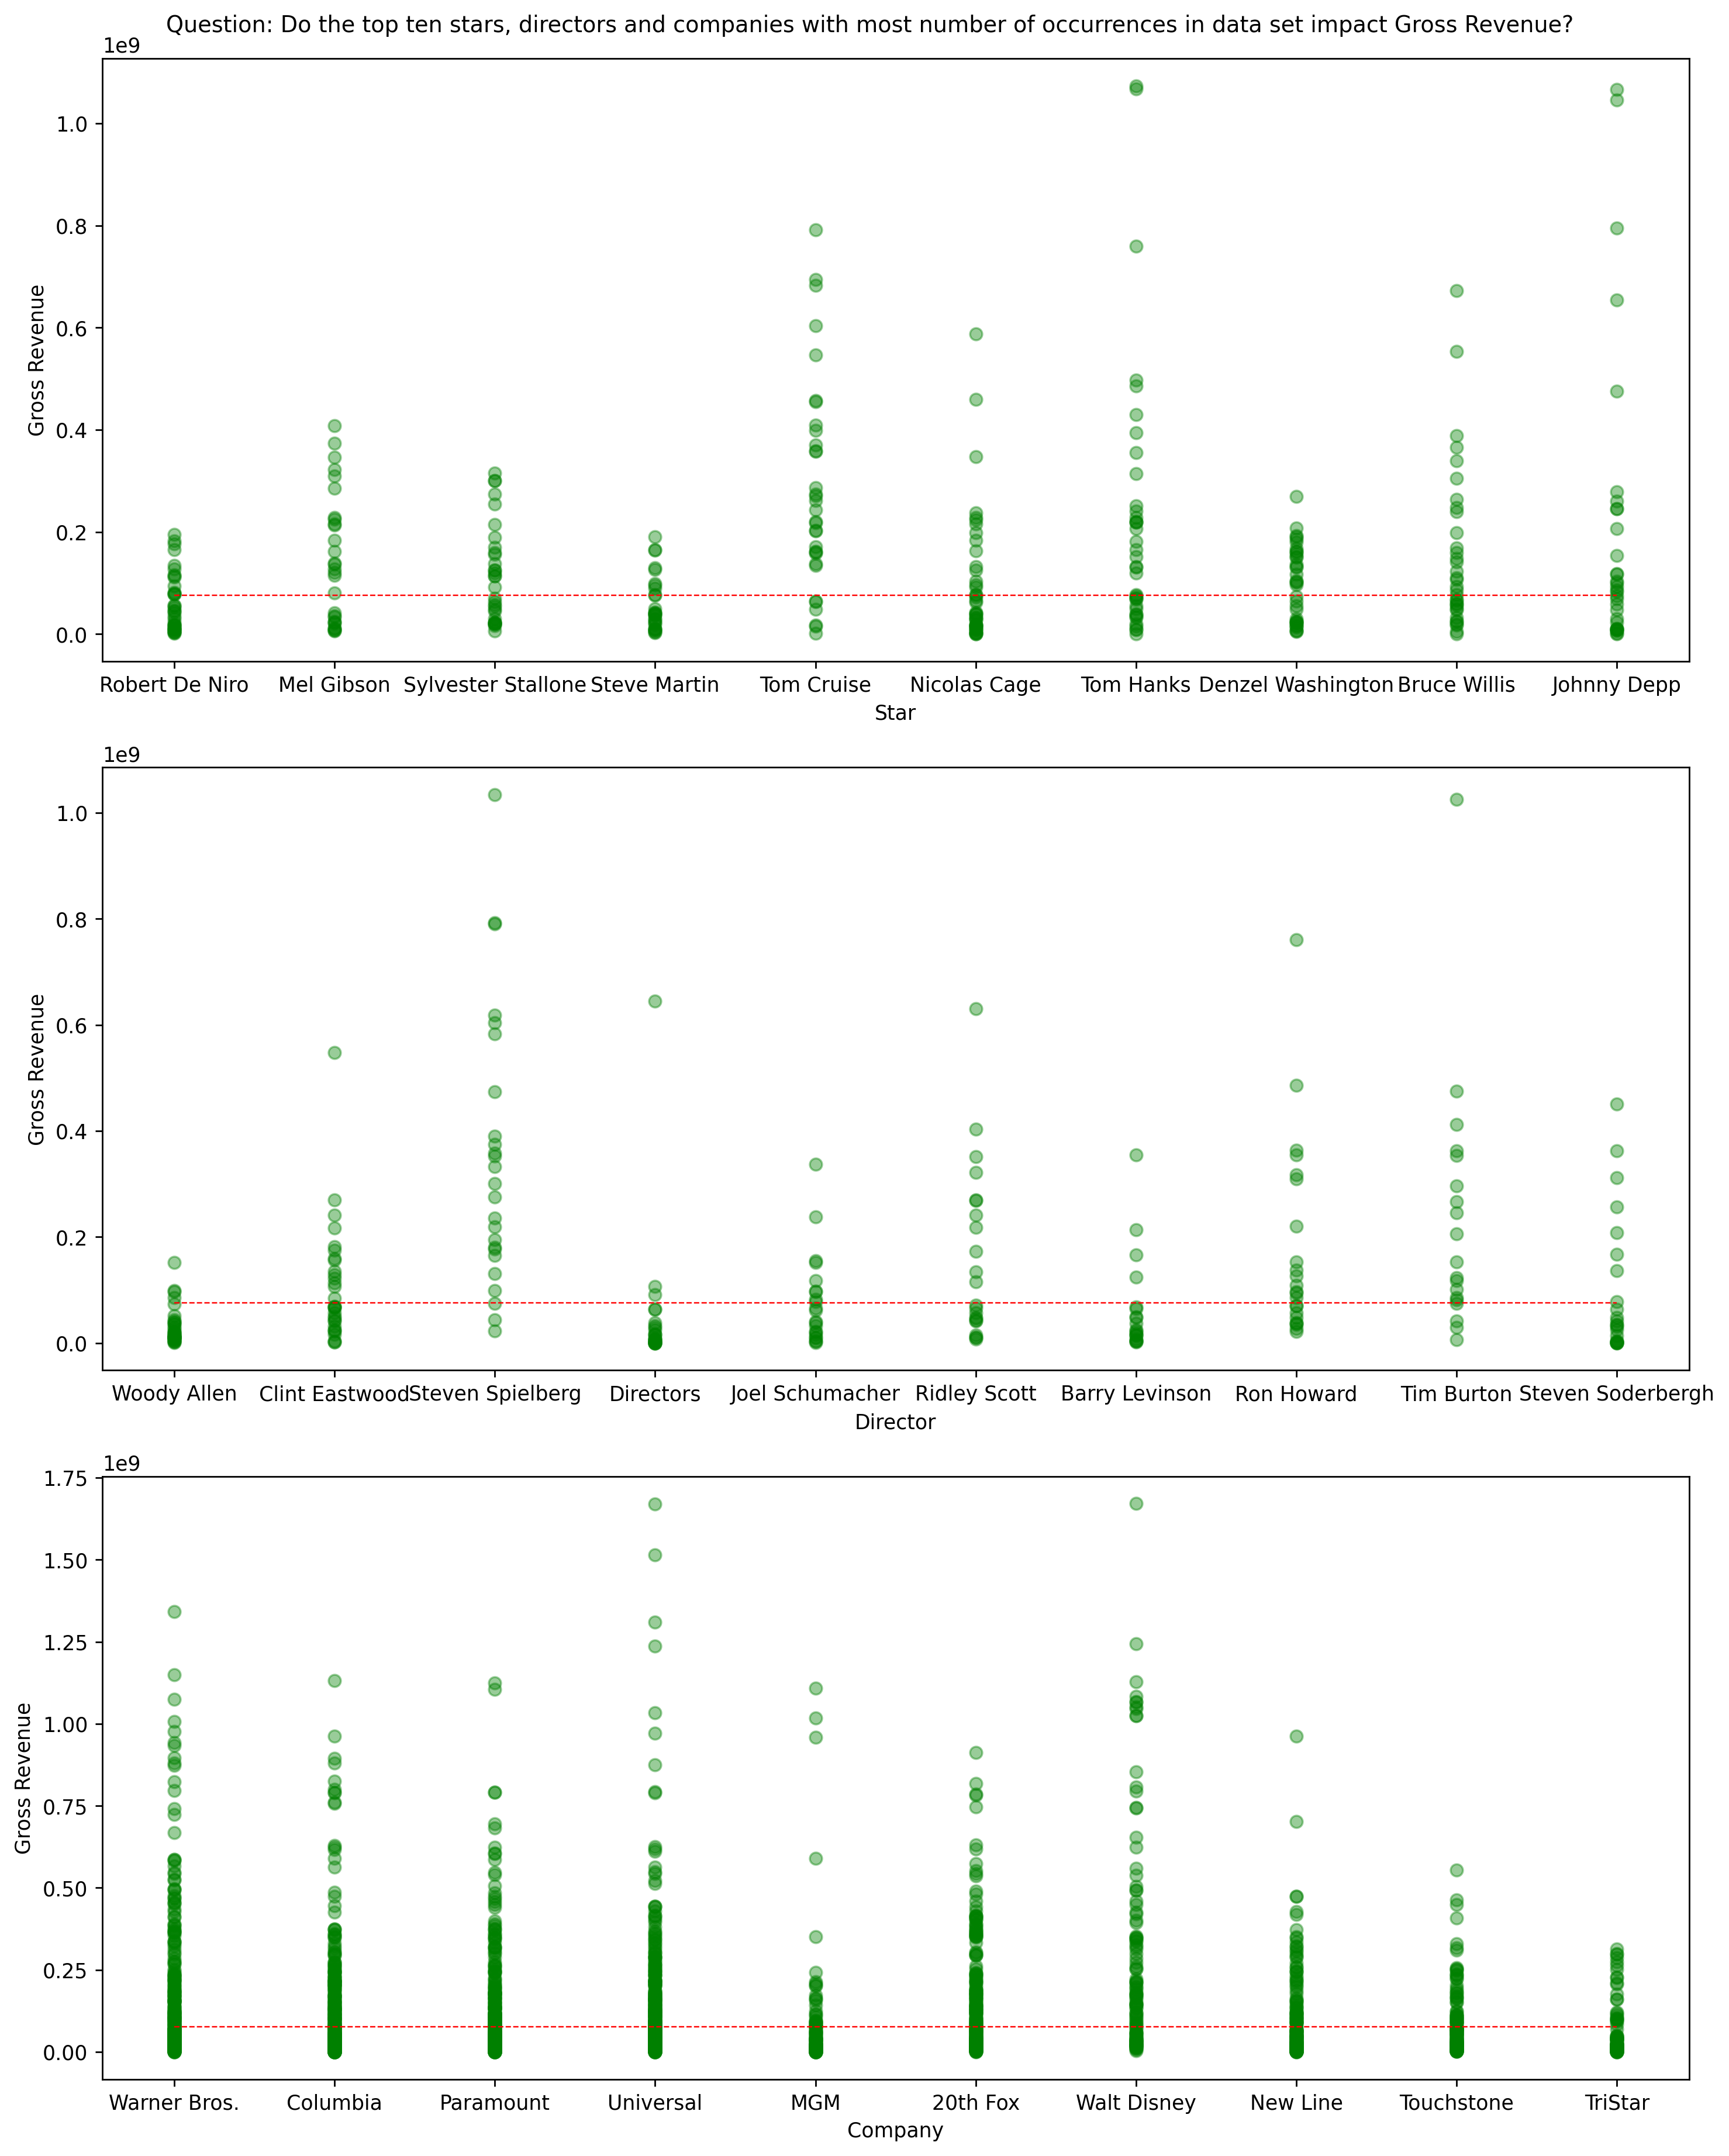

In [123]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(12,15),dpi=250)
ax[0].plot(df_star['star'],df_star['gross'],'o',alpha=0.4,color='green')
ax[0].set_xlabel('Star')
ax[0].set_ylabel('Gross Revenue')
ax[0].hlines(y=7.567821e+07,xmin=0,xmax=9,color='red',ls='--',lw=0.7)

ax[1].plot(df_director['director'],df_director['gross'],'o',alpha=0.4,color='green')
ax[1].set_xlabel('Director')
ax[1].set_ylabel('Gross Revenue')
ax[1].hlines(y=7.567821e+07,xmin=0,xmax=9,color='red',ls='--',lw=0.7)

ax[2].plot(df_company['company'],df_company['gross'],'o',alpha=0.4,color='green')
ax[2].set_xlabel('Company')
ax[2].set_ylabel('Gross Revenue')
ax[2].hlines(y=7.567821e+07,xmin=0,xmax=9,color='red',ls='--',lw=0.7)

plt.suptitle('Question: Do the top ten stars, directors and companies with most number of occurrences in data set impact Gross Revenue?',fontsize=11)
plt.tight_layout()
plt.show()

In [124]:
df.mean(numeric_only=True,axis=0)

score            6.401730e+00
votes            8.293515e+01
release_month    6.571969e+00
release_year     2.000722e+03
runtime          1.069843e+02
budget           3.450938e+07
br_ratio         3.187084e+05
gross            7.567821e+07
dtype: float64

In [125]:
df_company_3 = df[df['company'].isin(df.groupby('company')['gross'].sum().sort_values(ascending=False).head(3).index)]

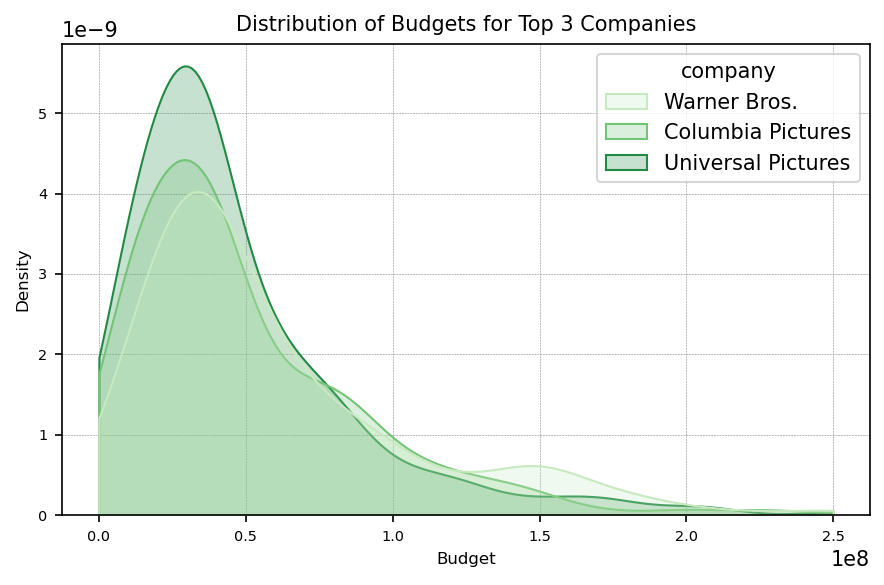

In [126]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(6,4),dpi=150)
sns.kdeplot(data=df_company_3,x='budget',hue='company',fill=True,clip=[0,2.5e+08],palette='Greens')

plt.title('Distribution of Budgets for Top 3 Companies', fontsize = 10)
plt.ylabel('Density', fontsize=8)
plt.xlabel('Budget', fontsize=8)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.25)
plt.tight_layout()
plt.show()

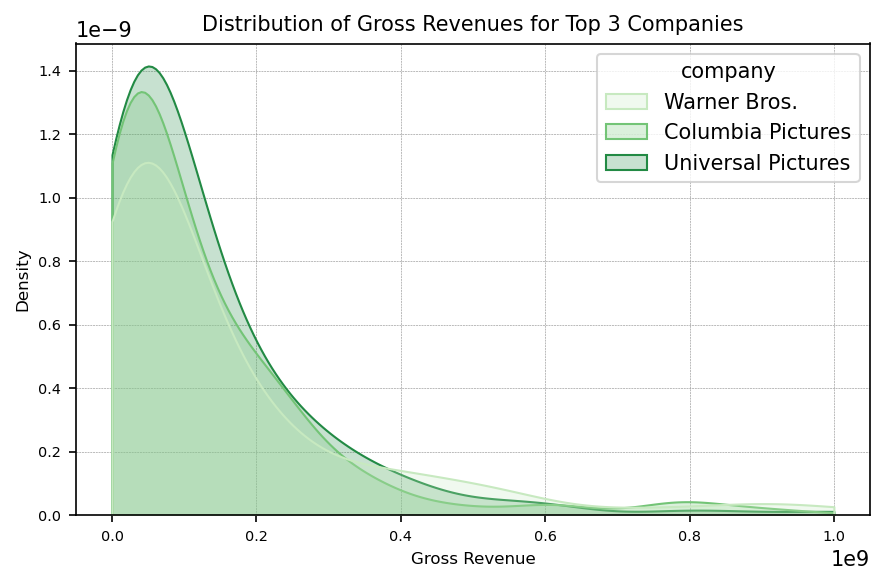

In [127]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(6,4),dpi=150)
sns.kdeplot(data=df_company_3,x='gross',hue='company',fill=True,clip=[0,1e+09],palette='Greens')

plt.title('Distribution of Gross Revenues for Top 3 Companies', fontsize = 10)
plt.ylabel('Density', fontsize=8)
plt.xlabel('Gross Revenue', fontsize=8)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.25)
plt.tight_layout()
plt.show()

Almost every star and director comes from US, so let's explore movies from Europe.  
We will consider top 10 based on highest number of movies.

In [128]:
df_eur = df[df['region']=='Europe']

In [129]:
df_eur.head()

name      genre  score  votes  release_month   
19                      Cruising      Crime    6.5   20.0              2  \
52                 City of Women     Comedy    7.0    6.7              4   
78  The King and the Mockingbird  Animation    7.9    4.8              3   
80         La Cage aux Folles II     Comedy    5.8    1.9              2   
95                    Possession      Drama    7.4   27.0             10   

    release_year     decade                  star          director   
19          1980  1980-1989             Al Pacino  William Friedkin  \
52          1981  1980-1989  Marcello Mastroianni  Federico Fellini   
78          1980  1980-1989           Jean Martin     Paul Grimault   
80          1981  1980-1989       Michel Serrault  Édouard Molinaro   
95          1983  1980-1989       Isabelle Adjani  Andrzej Zulawski   

                       company  region  runtime        budget    br_ratio   
19  Lorimar Film Entertainment  Europe      102  1.100000e+07  107843.137  \
52       Opera Film Produzione  Europe      139  2.889595e+07  207884.503   
78     Les Films Paul Grimault  Europe       83  2.889595e+07  348143.927   
80      Da.Ma. Cinematografica  Europe      102  2.889595e+07  283293.588   
95                     Gaumont  Europe      124  2.889595e+07  233031.822   

         gross  
19  19814523.0  
52     12516.0  
78    167451.0  
80   6950125.0  
95   1113538.0

In [130]:
df_eur.groupby('star')['gross'].count().sort_values(ascending=False).head(10)

star
Gérard Depardieu     9
Juliette Binoche     7
Isabelle Huppert     6
Jason Statham        5
John Travolta        5
Mads Mikkelsen       5
Milla Jovovich       5
Roberto Benigni      4
Liam Neeson          4
Samuel L. Jackson    4
Name: gross, dtype: int64

In [131]:
df_eur.groupby('director')['gross'].count().sort_values(ascending=False).head(10)

director
Pedro Almodóvar       14
Luc Besson            11
Lars von Trier        10
Éric Rohmer            7
Roman Polanski         7
Giuseppe Tornatore     7
François Ozon          7
Michael Haneke         6
Olivier Assayas        5
David Lynch            5
Name: gross, dtype: int64

In [132]:
df_eur_star = df_eur[df_eur['star'].isin(df_eur.groupby('star')['gross'].count().sort_values(ascending=False).head(10).index)]

In [133]:
df_eur_dir = df_eur[df_eur['director'].isin(df_eur.groupby('director')['gross'].count().sort_values(ascending=False).head(10).index)]

In [134]:
df.groupby('region')['gross'].mean()

region
Asia      6.395781e+07
Europe    3.115717e+07
Other     4.023827e+07
UK        6.051277e+07
USA       8.641399e+07
Name: gross, dtype: float64

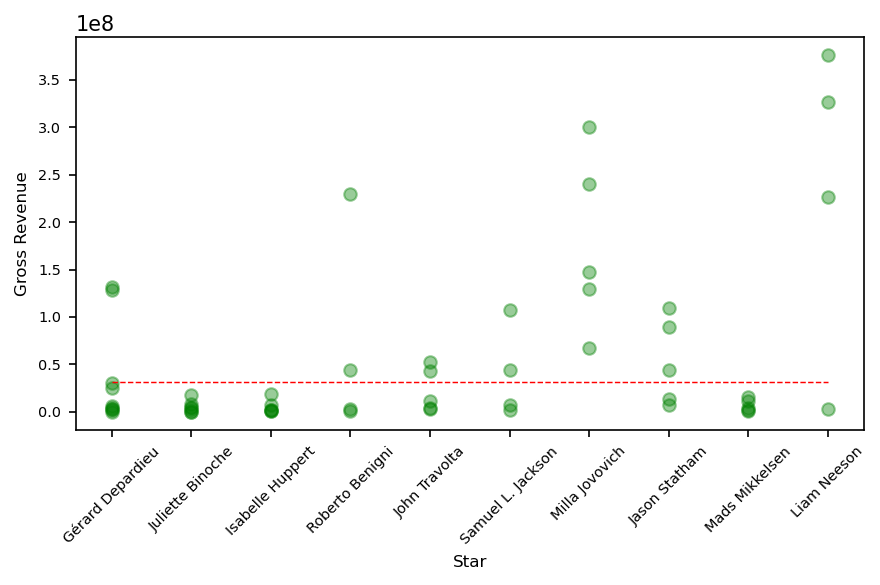

In [135]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(df_eur_star['star'],df_eur_star['gross'],'o',alpha=0.4,color='green')
plt.xlabel('Star',fontsize=8)
plt.ylabel('Gross Revenue',fontsize=8)
plt.hlines(y=3.115717e+07,xmin=0,xmax=9,color='red',ls='--',lw=0.7)
plt.xticks(rotation=45,size='x-small')
plt.yticks(size='x-small')
plt.tight_layout()
plt.show()

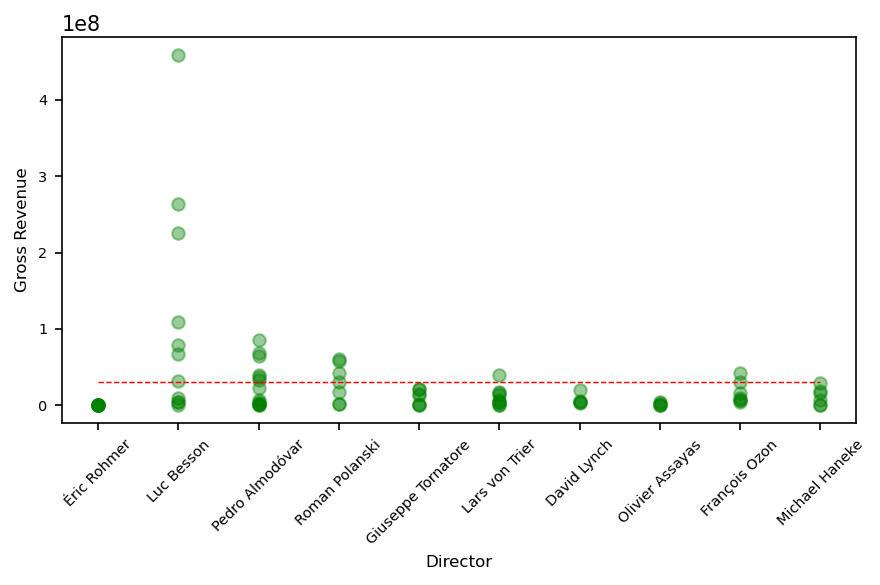

In [136]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(df_eur_dir['director'],df_eur_dir['gross'],'o',alpha=0.4,color='green')
plt.xlabel('Director',fontsize=8)
plt.ylabel('Gross Revenue',fontsize=8)
plt.hlines(y=3.115717e+07,xmin=0,xmax=9,color='red',ls='--',lw=0.7)
plt.xticks(rotation=45,size='x-small')
plt.yticks(size='x-small')
plt.tight_layout()
plt.show()

#### Inferences:
1. For whole data set, movies featuring Tom Hanks, Cruise, Johnny Depp have the widest range of profits, and in most cases gross more than the average of the population.
2. For whole data set, movies directed by S.Spileberg, Tim Burton or Ridley Scott have the widest range of profits, and in most cases gross more than the average of the population.
3. Top 3 companies are Universal Pictures, Warner Bros., Columbia Pictures.  
4. The leader in expenses and profits is Universal Pictures
   Remaining two companies spend similar budgets on film production, and have similarly high profits to a large extent.
5. For movies from Europe (without UK) highest profit generate Liam Neeson, and Luc Besson (Note! Europe sample is significantly smaller)

### 3.5 Budget/Runtime Ratio

In [137]:
X2 = df['budget']
y2 = df['runtime']

In [138]:
np.polyfit(X2,y2,deg=2)

array([-2.79180338e-16,  1.71475659e-07,  1.01720864e+02])

In [139]:
potentianl_runtime = np.linspace(0,3.0e+08,1000)

In [140]:
predicted_runtime = -2.08714587e-16*potentianl_runtime**2 + 1.64514055e-07*potentianl_runtime+1.01886734e+02

In [141]:
X3 = df['br_ratio']
y3 = df['gross']

In [142]:
np.polyfit(X3,y3,deg=2)

array([1.40271208e-04, 1.43316399e+02, 3.50750961e+06])

In [143]:
potentianl_gross = np.linspace(0,2.5e+06,1000)

In [144]:
predicted_gross = 1.37050340e-04*potentianl_gross**2 + 1.48081922e+02*potentianl_gross+3.06213130e+06

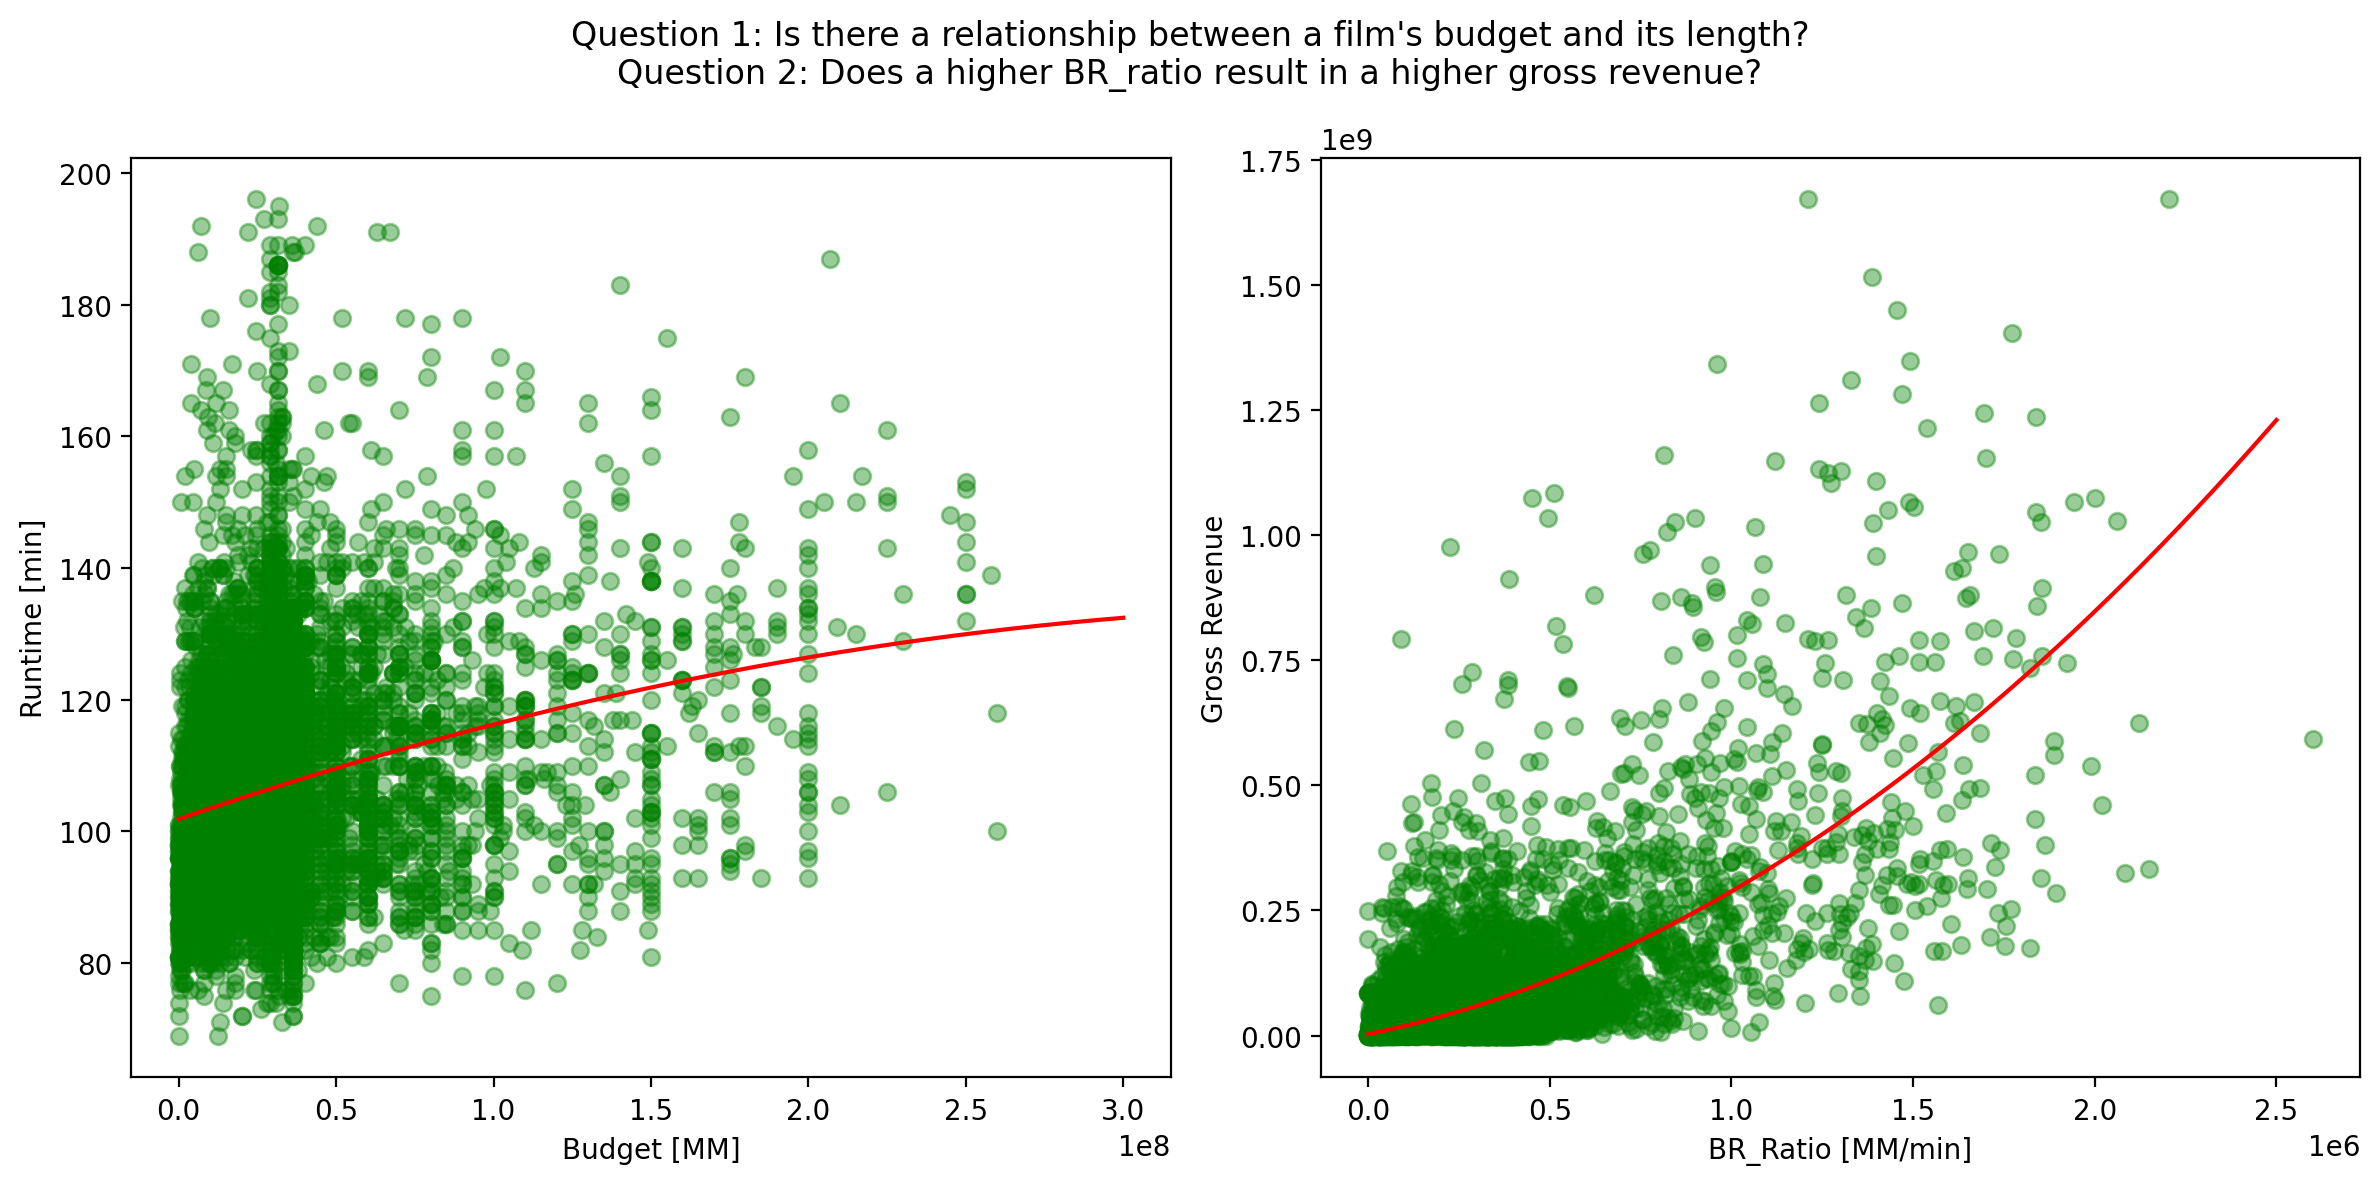

In [145]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),dpi=200)
ax[0].plot(df['budget'],df['runtime'],'o',alpha=0.4,color='green')
ax[0].set_xlabel('Budget [MM]')
ax[0].set_ylabel('Runtime [min]')
ax[0].plot(potentianl_runtime,predicted_runtime,color='red')

ax[1].plot(df['br_ratio'],df['gross'],'o',alpha=0.4,color='green')
ax[1].set_xlabel('BR_Ratio [MM/min]')
ax[1].set_ylabel('Gross Revenue')
ax[1].plot(potentianl_gross,predicted_gross,color='red')

plt.suptitle('Question 1: Is there a relationship between a film\'s budget and its length?\nQuestion 2: Does a higher BR_ratio result in a higher gross revenue?',fontsize=12)
plt.tight_layout()
plt.show()

In [146]:
df[(df['budget']>2.3e+08)&(df['runtime']<=120)]

name      genre  score  votes  release_month  release_year   
5454        Tangled  Animation    7.7  417.0             11          2010  \
7251  The Lion King  Animation    6.9  222.0              7          2019   

         decade           star      director                        company   
5454  2010-2020    Mandy Moore  Nathan Greno  Walt Disney Animation Studios  \
7251  2010-2020  Donald Glover   Jon Favreau           Walt Disney Pictures   

     region  runtime       budget     br_ratio         gross  
5454    USA      100  260000000.0  2600000.000  5.924628e+08  
7251    USA      118  260000000.0  2203389.831  1.670728e+09

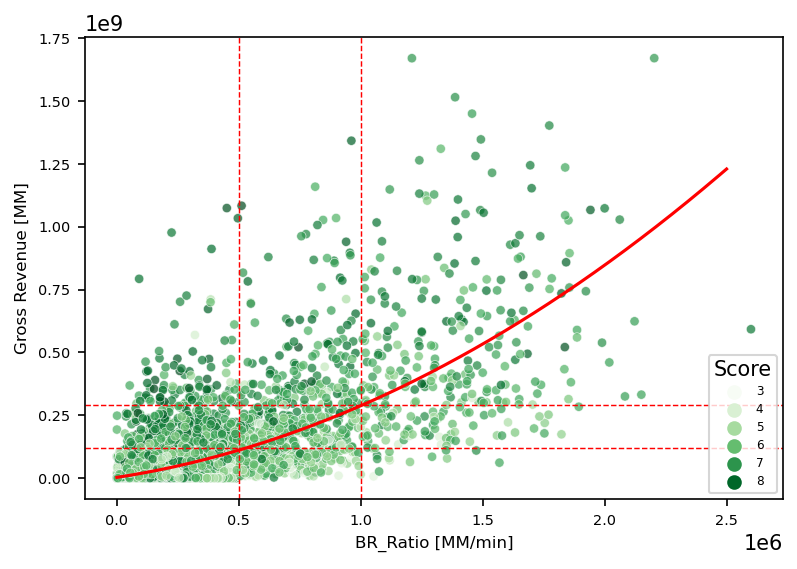

In [147]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='br_ratio',y='gross',alpha=0.7,s=20,hue='score',palette="Greens")
plt.plot(potentianl_gross,predicted_gross,color='red')

plt.axvline(x=0.5e+06,color='red',ls='--',lw=0.7)
plt.axvline(x=1e+06,color='red',ls='--',lw=0.7)
plt.axhline(y=0.12e+09,color='red',ls='--',lw=0.7)
plt.axhline(y=0.29e+09,color='red',ls='--',lw=0.7)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.ylabel('Gross Revenue [MM]', fontsize=8)
plt.xlabel('BR_Ratio [MM/min]', fontsize=8)
# plt.title('Votes vs Score',fontsize=10)
plt.legend(title='Score',loc='lower right',fontsize='xx-small')
plt.show()

#### Inferences:
1. There is a weak positive relationship between budget and runtime. In genral the longer the movie the higher the budget.
   However there are huge number of movies with budget below 50MM and runtime much above 2h.
   Very often animated movies are very epensive to create, hence they are shorter.
2. There is linear increase in gross revenue while BR ratio increase as well. The more it costs to produce one minute of movie, the greater the profit. Indirectly, the ratio can be interpreted as an indicator of the quality of the film, because the higher it is, the higher the score of production.
3. For every increase of 500,000 gross revenue increase by 170,000,000.

### 3.6 Budget vs Gross Revenue

In [148]:
for i in range(1,5):
    print('Degree =',i,np.polyfit(x=df['budget'],y=df['gross'],deg=i))

Degree = 1 [ 3.10773568e+00 -3.15678273e+07]
Degree = 2 [1.11240534e-08 1.32131521e+00 4.01913067e+06]
Degree = 3 [-7.40285073e-17  3.21063687e-08 -2.80918313e-02  2.11082964e+07]
Degree = 4 [ 8.08075659e-25 -4.16562631e-16  7.48896472e-08 -1.62256271e+00
  3.41426292e+07]


In [149]:
pred_gross = np.linspace(0,2.7e+08,1000)

In [150]:
deg_1 = 3.10773568e+00*pred_gross + -3.15678273e+07

In [151]:
deg_2 = 1.11240534e-08*pred_gross**2 + 1.32131521e+00*pred_gross + 4.01913067e+06

In [152]:
deg_3 = -7.40285073e-17*pred_gross**3 + 3.21063687e-08*pred_gross**2 + -2.80918313e-02*pred_gross + 2.11082964e+07

In [153]:
deg_4 = 8.08075659e-25*pred_gross**4 + -4.16562631e-16*pred_gross**3 + 7.48896472e-08*pred_gross**2 + -1.62256271e+00*pred_gross + 3.41426292e+07 

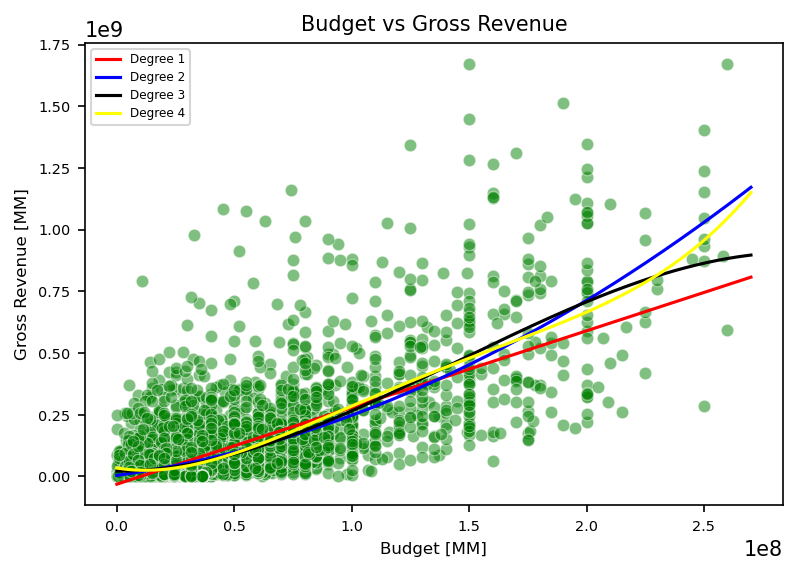

In [154]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='budget',y='gross',alpha=0.5,color='green')
plt.plot(pred_gross,deg_1,color='red',label='Degree 1')
plt.plot(pred_gross,deg_2,color='blue',label='Degree 2')
plt.plot(pred_gross,deg_3,color='black',label='Degree 3')
plt.plot(pred_gross,deg_4,color='yellow',label='Degree 4')

plt.title('Budget vs Gross Revenue',fontsize=10)
plt.xlabel("Budget [MM]",fontsize=8)
plt.ylabel("Gross Revenue [MM]",fontsize=8)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.legend(loc='upper left',fontsize='xx-small')
plt.show()

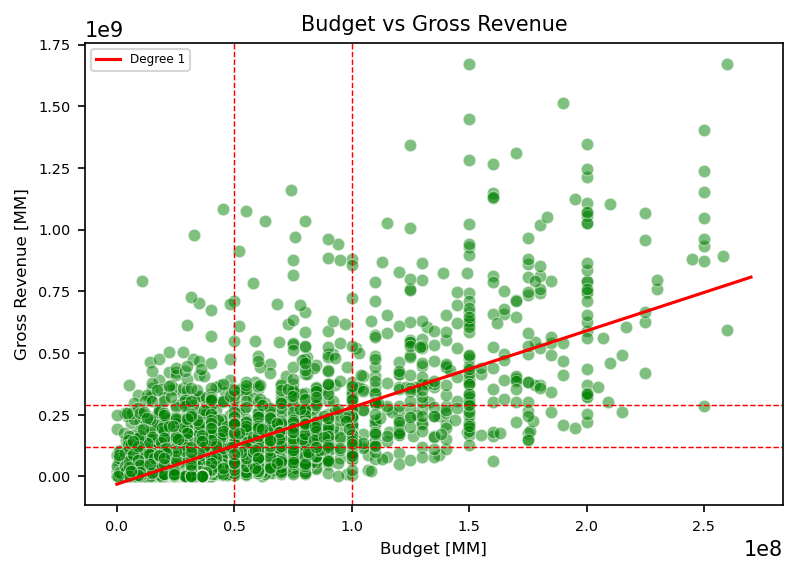

In [155]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='budget',y='gross',alpha=0.5,color='green')
plt.plot(pred_gross,deg_1,color='red',label='Degree 1')
plt.axvline(x=0.5e+08,color='red',ls='--',lw=0.7)
plt.axvline(x=1e+08,color='red',ls='--',lw=0.7)
plt.axhline(y=0.12e+09,color='red',ls='--',lw=0.7)
plt.axhline(y=0.29e+09,color='red',ls='--',lw=0.7)

plt.title('Budget vs Gross Revenue',fontsize=10)
plt.xlabel("Budget [MM]",fontsize=8)
plt.ylabel("Gross Revenue [MM]",fontsize=8)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.legend(loc='upper left',fontsize='xx-small')
plt.show()

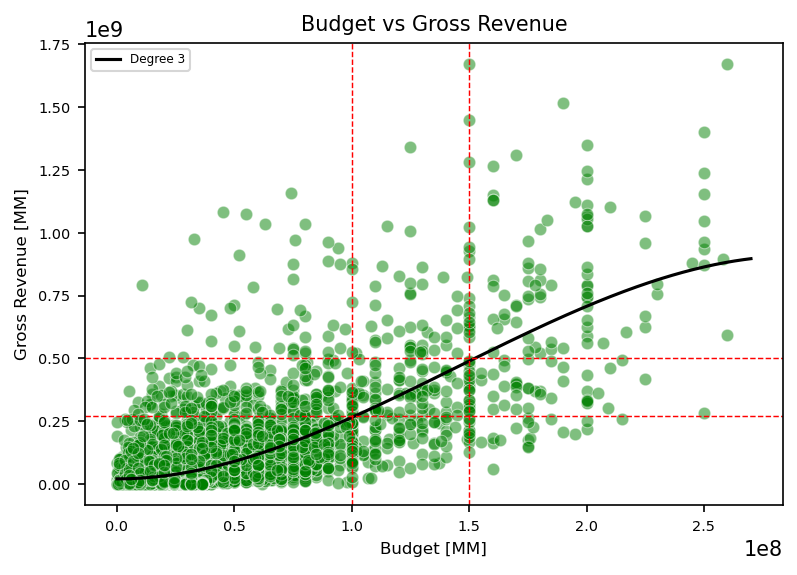

In [156]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='budget',y='gross',alpha=0.5,color='green')
plt.plot(pred_gross,deg_3,color='black',label='Degree 3')
plt.axvline(x=1.5e+08,color='red',ls='--',lw=0.7)
plt.axvline(x=1e+08,color='red',ls='--',lw=0.7)
plt.axhline(y=0.27e+09,color='red',ls='--',lw=0.7)
plt.axhline(y=0.50e+09,color='red',ls='--',lw=0.7)

plt.title('Budget vs Gross Revenue',fontsize=10)
plt.xlabel("Budget [MM]",fontsize=8)
plt.ylabel("Gross Revenue [MM]",fontsize=8)
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.legend(loc='upper left',fontsize='xx-small')
plt.show()

#### Inferences:
1. The higher the degree of the fitting polynomial of the regression line, the greater the flexibility of the model. 
2. The greater the flexibility, the greater the variance and the less bias. Higher degrees polynomial lines are reducing noise in data. However, such sitiuation can lead to overfitting, where the model predicts "too well" on the training data and badly on the test data.
3. The reverse situation would be a first-order regression line, which means a very large bias resulting from a strong simplification of the model. Regardless of the size of the training data, the model will not be able to accurately estimate.
4. In general it is desirable to minimize the variance and bias, what requires more complicated regression methods.
5. Degree 1:  
   For every increase in budget of 50,000,000, gross revenue increase by 170,000,000.   
   In simplier terms for every dollar spend on movie budget we can estimate 3,4 dollars of profit.
6. Degree 3:  
   For every increase in budget of 50,000,000, gross revenue increase by 230,000,000.   
   In simplier terms for every dollar spend on movie budget we can estimate 4,6 dollars of profit.